## Import

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import collections
import logging
import pprint

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import core.artificial_signal_generators as sig_gen
import core.plotting as plot
import core.signal_processing as sigp
import core.statistics as stats
import helpers.dbg as dbg
import helpers.env as env
import helpers.printing as prnt

/wd/dan/commodity_research/amp/core/explore.py:28: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  import tqdm.autonotebook as tqdm


In [2]:
dbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", env.get_system_signature()[0])

prnt.config_notebook()

# Packages
         python: 3.7.6
       gluonnlp: 0.9.1
        gluonts: 0.5.0
         joblib: 0.15.1
          mxnet: 1.6.0
          numpy: 1.17.5
         pandas: 1.0.4
        pyarrow: 0.17.1
          scipy: 1.4.1
        seaborn: 0.10.1
        sklearn: 0.23.1
    statsmodels: 0.11.1
# Last commits:
  * cfa722b6 DanilYachmenev PartTask3205: unify format of axes with other double plots        (11 minutes ago) Thu Jul 2 12:20:03 2020  (HEAD -> PartTask3205_fix_plot_cols_for_cases_when_axes_are_not_provided, origin/PartTask3205_fix_plot_cols_for_cases_when_axes_are_not_provided)
  * 7471003b DanilYachmenev PartTask3205: fix plot_cols for cases when axes are not provided  (28 minutes ago) Thu Jul 2 12:02:59 2020           
  *   7d519c95 Paul     Merge pull request #394 from alphamatic/PartTask3201_multipletests_plot_hits_an_index_error (  21 hours ago) Wed Jul 1 15:08:35 2020  (origin/master, origin/PartTask3205_check_changes_on_gallery_signal_processing_notebook, origin/PartTask3

# Generate signal

In [3]:
arma00process = sig_gen.ArmaProcess([], [])

In [4]:
rets = arma00process.generate_sample(
    {"start": "2000-01-01", "periods": 4 * 252, "freq": "B"},
    scale=0.01,
    burnin=20,
    seed=42,
)

In [5]:
price = np.exp(rets.cumsum())

In [6]:
rets.name += "_rets"
price.name += "_price"

## Price

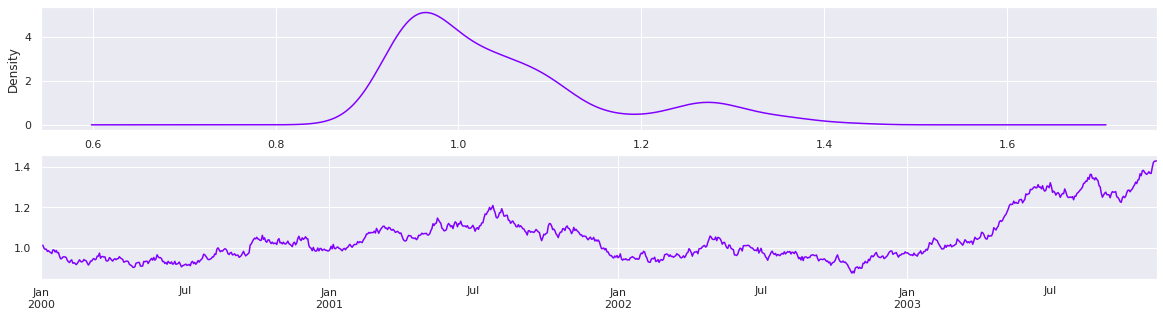

In [7]:
plot.plot_cols(price)

In [8]:
price_decomp = sigp.get_trend_residual_decomp(price, tau=16)

In [9]:
price_decomp.head(3)

trend  residual
2000-01-03  1.014764  0.000000
2000-01-04  1.013584 -0.001109
2000-01-05  1.013434 -0.000274

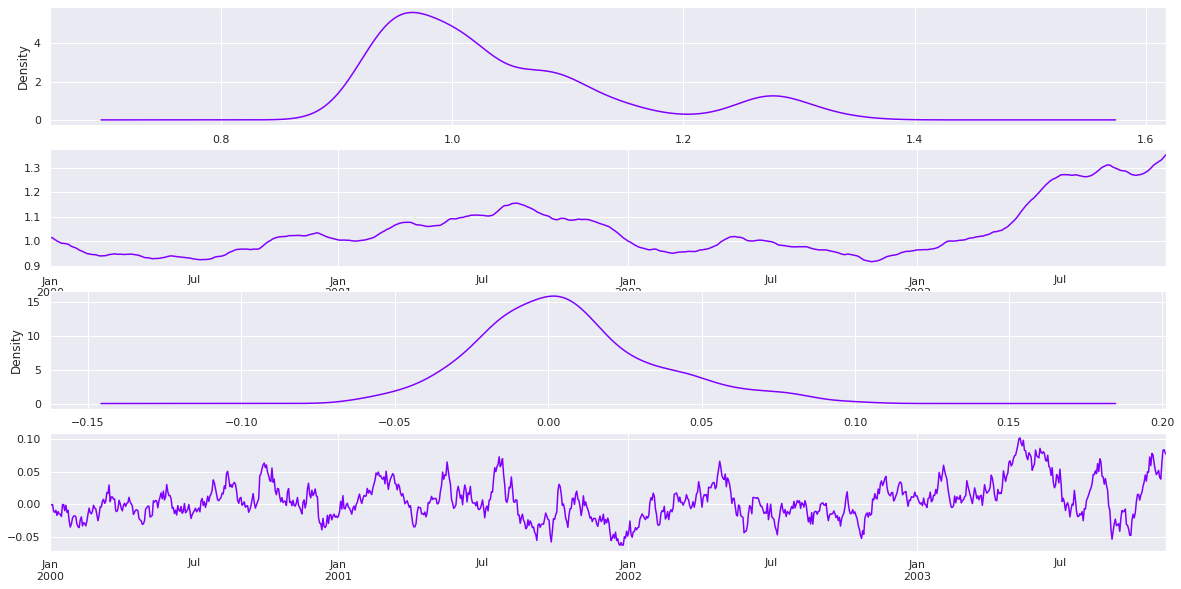

In [10]:
plot.plot_cols(price_decomp)

In [11]:
price_decomp.apply(stats.apply_adf_test)

trend     residual
stat                     0.327395    -5.177707
pval                     0.978567     0.000010
used_lag                 1.000000     0.000000
nobs                  1006.000000  1007.000000
critical_values_1%      -3.436867    -3.436860
critical_values_5%      -2.864417    -2.864414
critical_values_10%     -2.568302    -2.568300
ic_best             -11726.248598 -6334.258877

### Price wavelet decomposition

In [12]:
price_smooth, price_detail = sigp.get_swt(price, wavelet="haar")

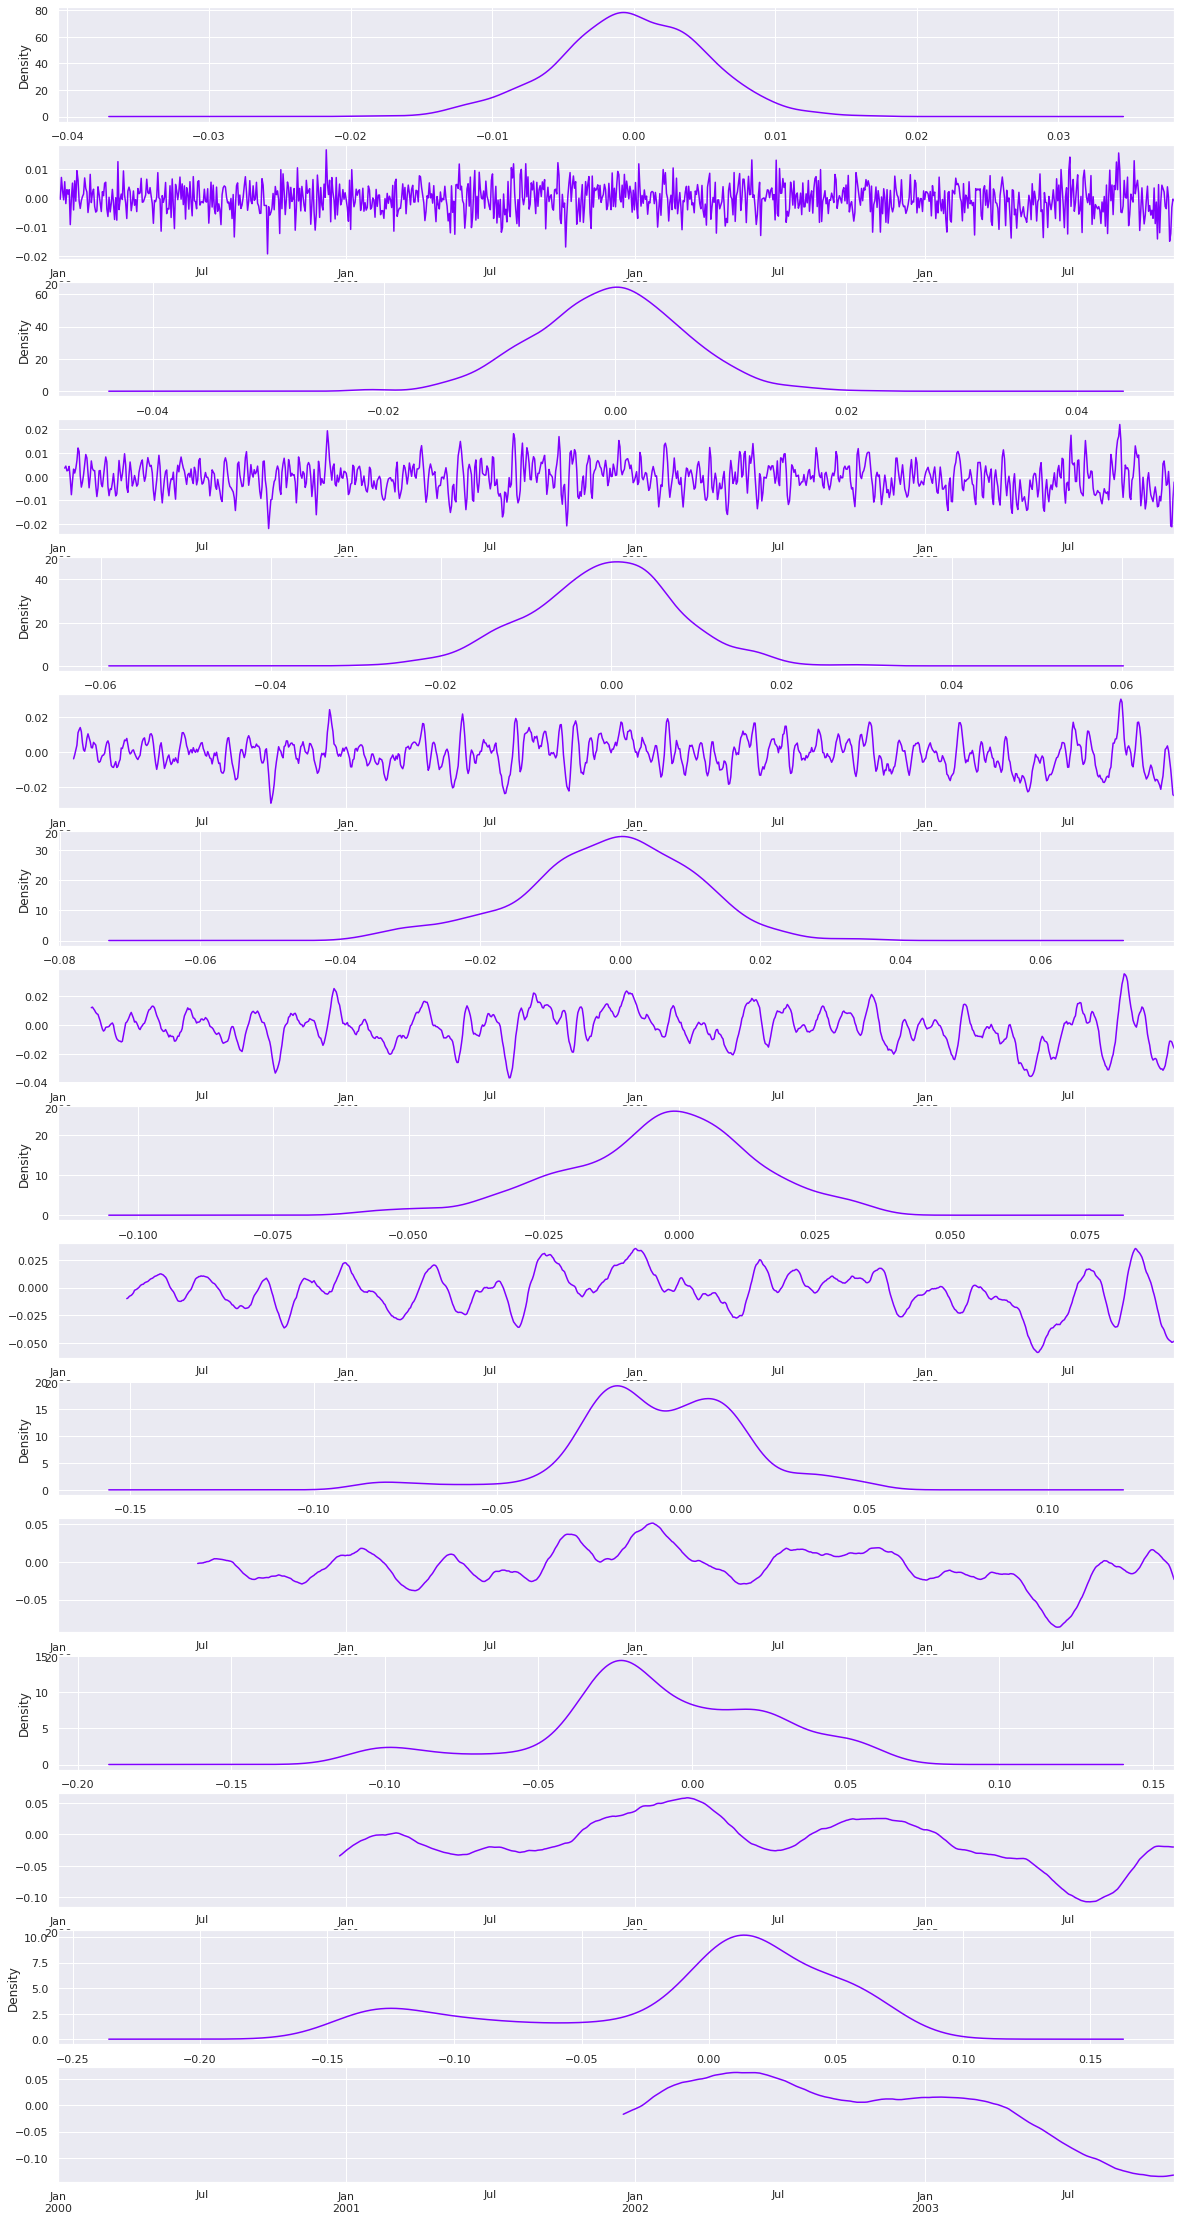

In [13]:
plot.plot_cols(price_detail)

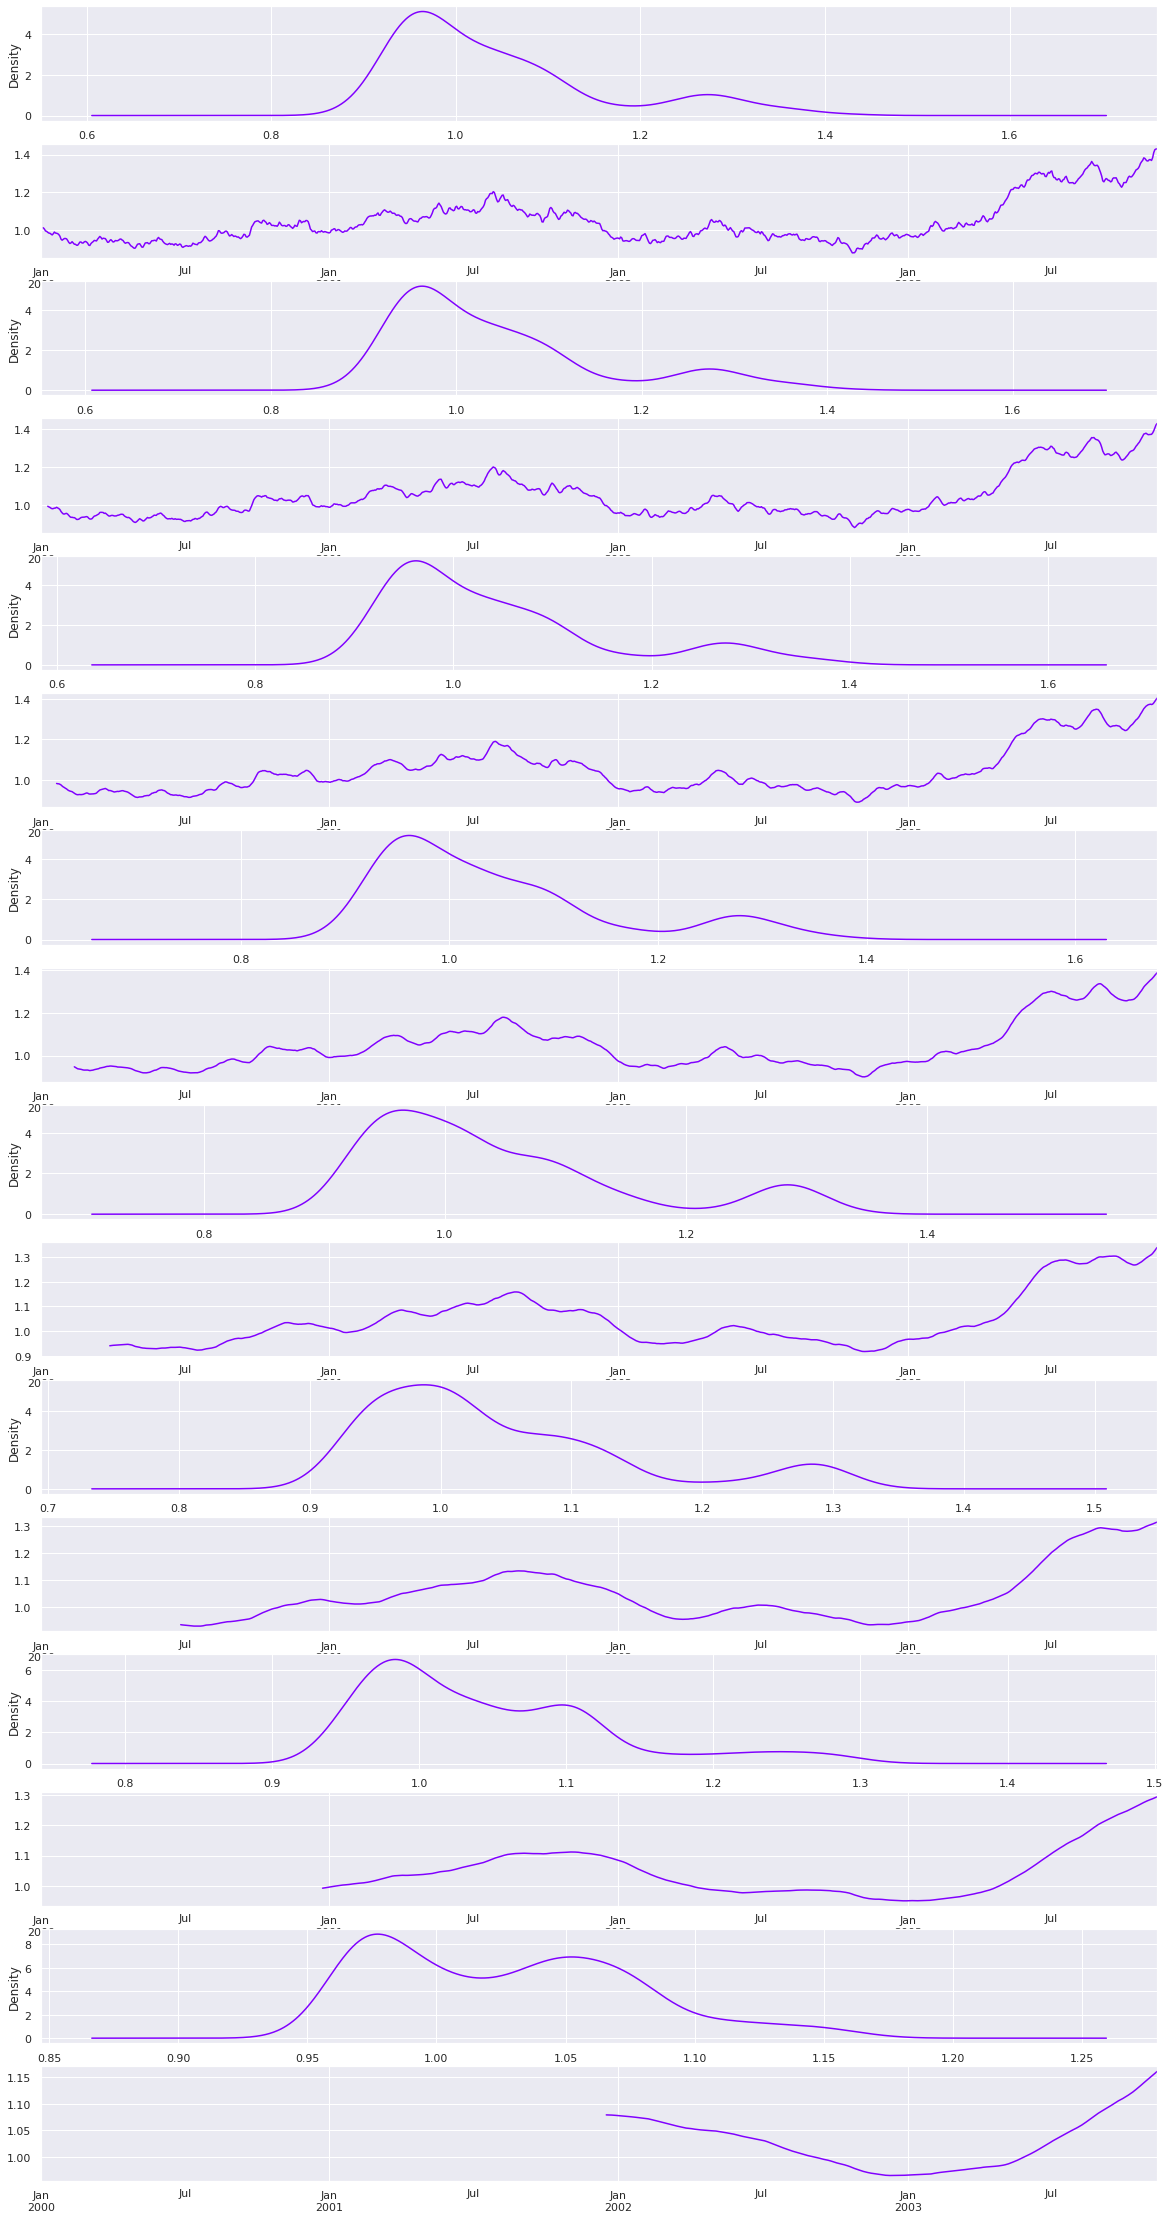

In [14]:
plot.plot_cols(price_smooth)

1         2         3         4         5         6         7         8
1  1.000000  0.413773  0.157901  0.074204  0.029508  0.003882  0.026449  0.059473
2  0.413773  1.000000  0.498893  0.205919  0.082348  0.017515  0.046396  0.096583
3  0.157901  0.498893  1.000000  0.538447  0.209654  0.055995  0.077201  0.126472
4  0.074204  0.205919  0.538447  1.000000  0.549765  0.164433  0.132283  0.150076
5  0.029508  0.082348  0.209654  0.549765  1.000000  0.500783  0.250377  0.178962
6  0.003882  0.017515  0.055995  0.164433  0.500783  1.000000  0.590427  0.256959
7  0.026449  0.046396  0.077201  0.132283  0.250377  0.590427  1.000000  0.670392
8  0.059473  0.096583  0.126472  0.150076  0.178962  0.256959  0.670392  1.000000

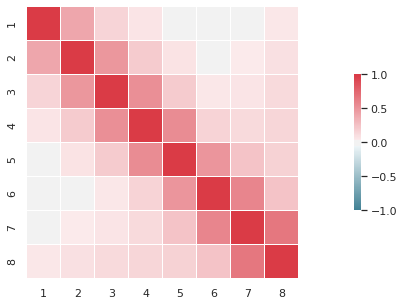

In [15]:
plot.plot_correlation_matrix(price_detail, mode="heatmap")

## Returns

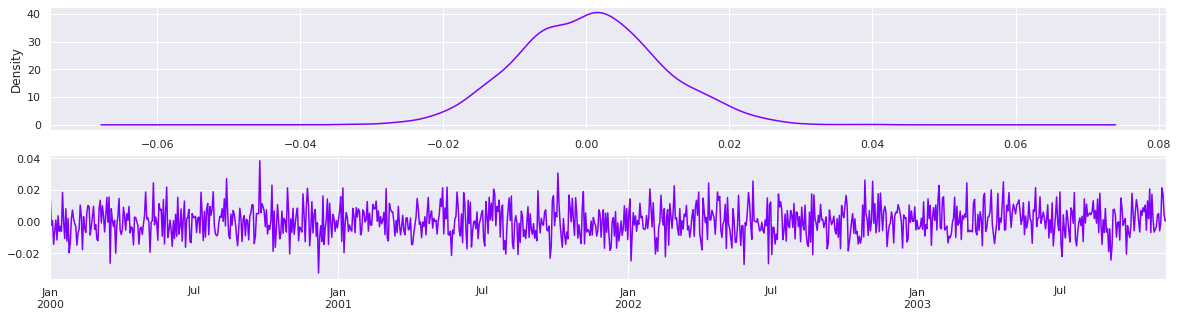

In [16]:
plot.plot_cols(rets)

In [17]:
stats.apply_normality_test(rets).to_frame()

arma(0,0)_rets
stat        2.487126
pval        0.288355

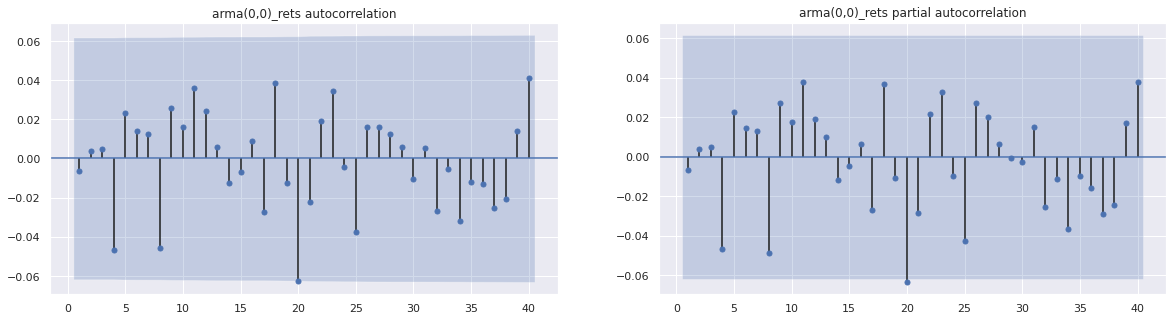

In [18]:
plot.plot_autocorrelation(rets)

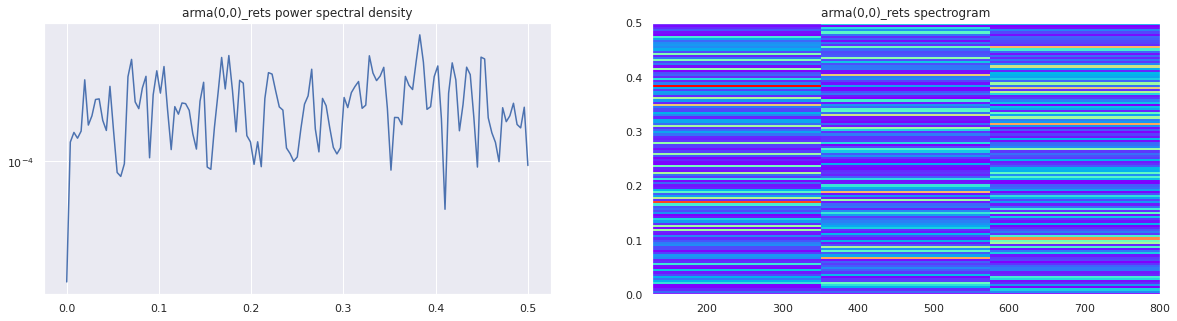

In [19]:
plot.plot_spectrum(rets)

### Returns wavelet decomposition

In [20]:
rets_smooth, rets_detail = sigp.get_swt(rets, "haar")

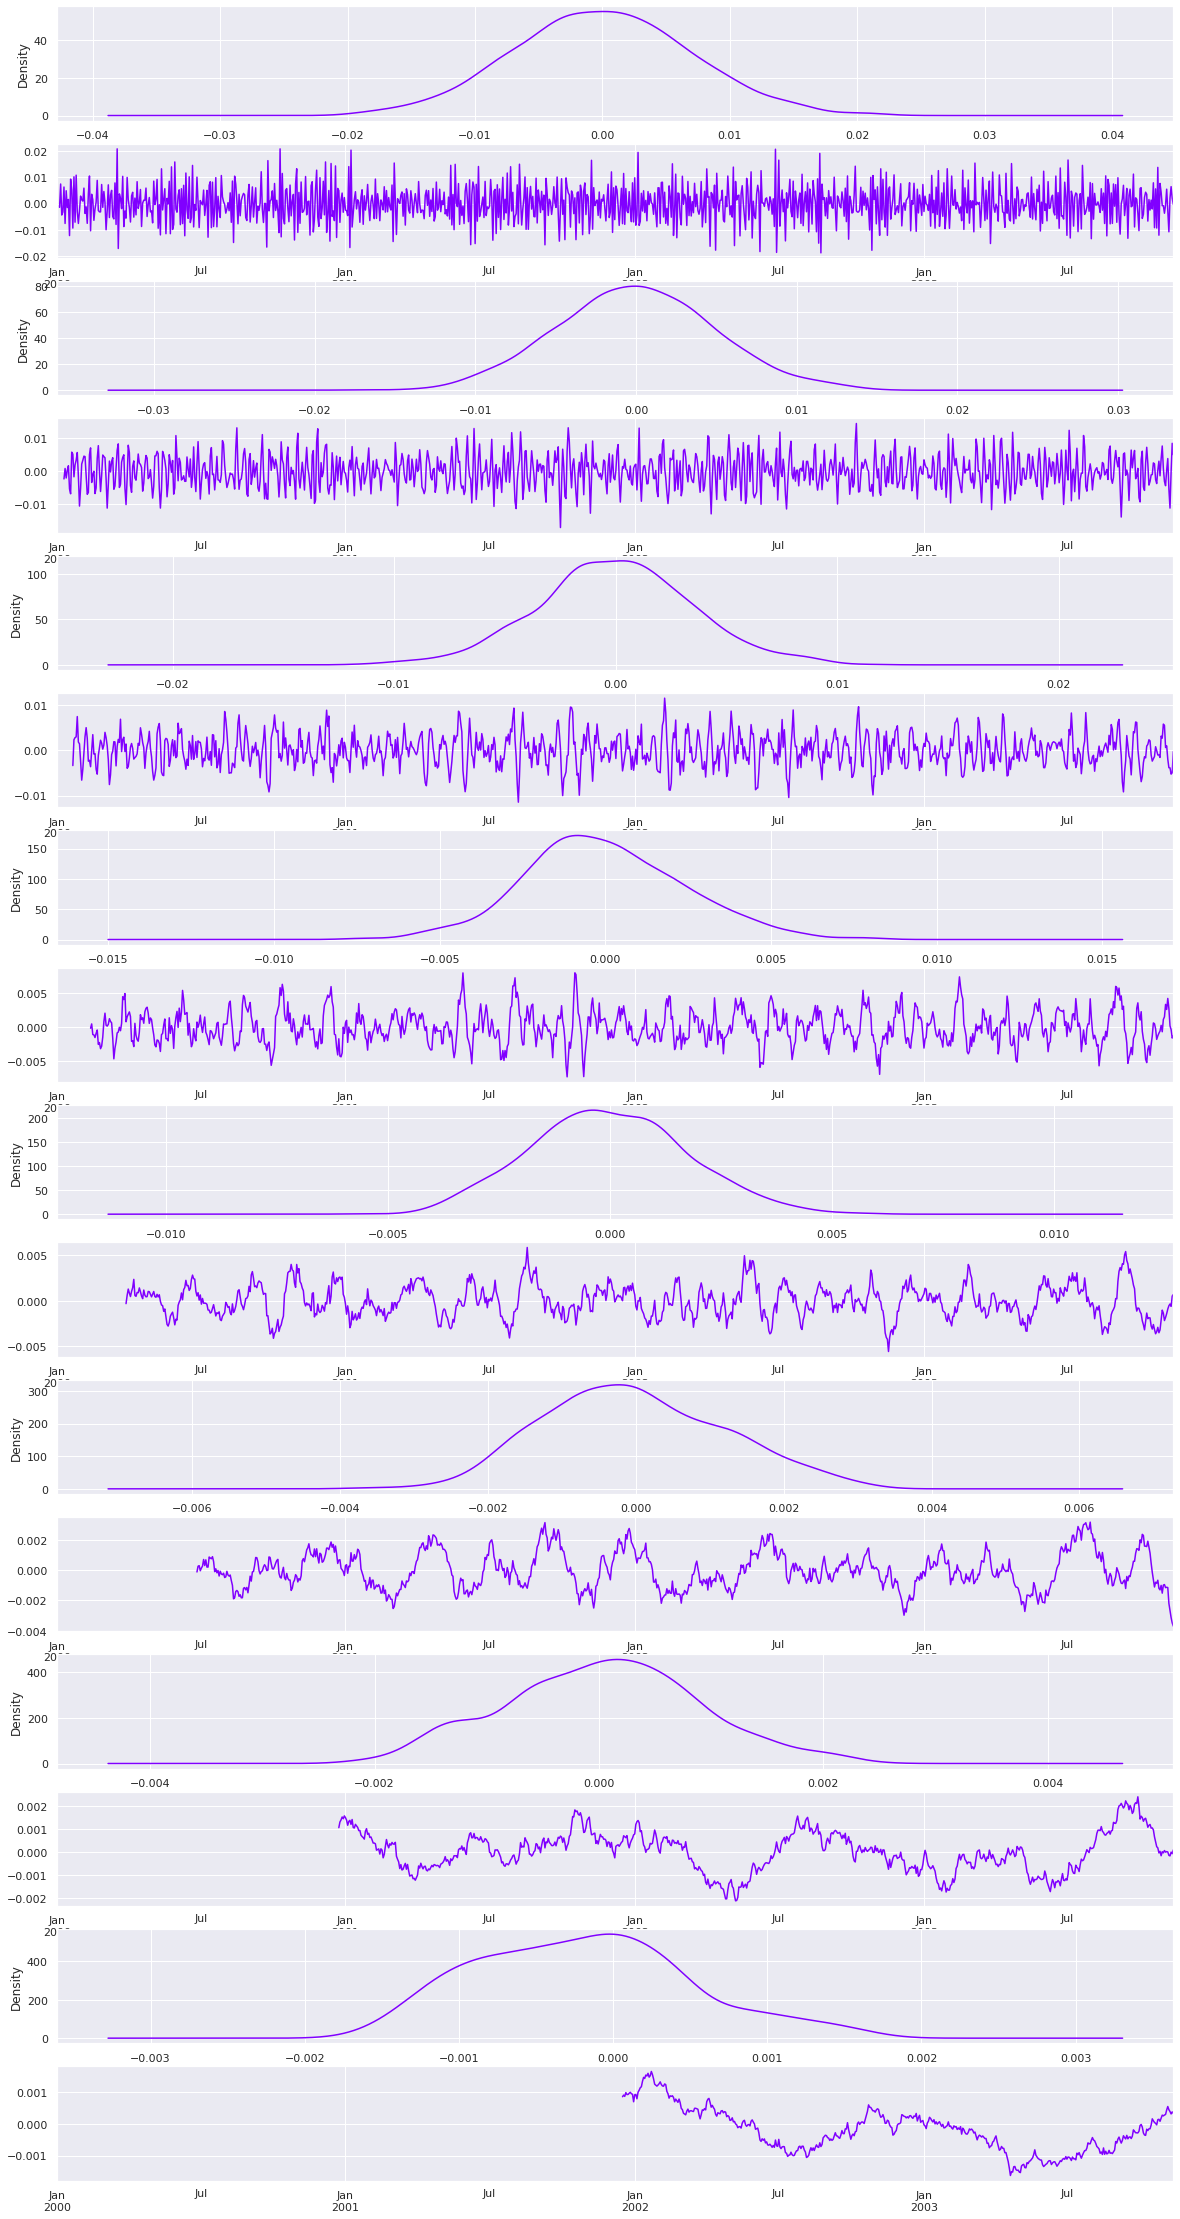

In [21]:
plot.plot_cols(rets_detail)

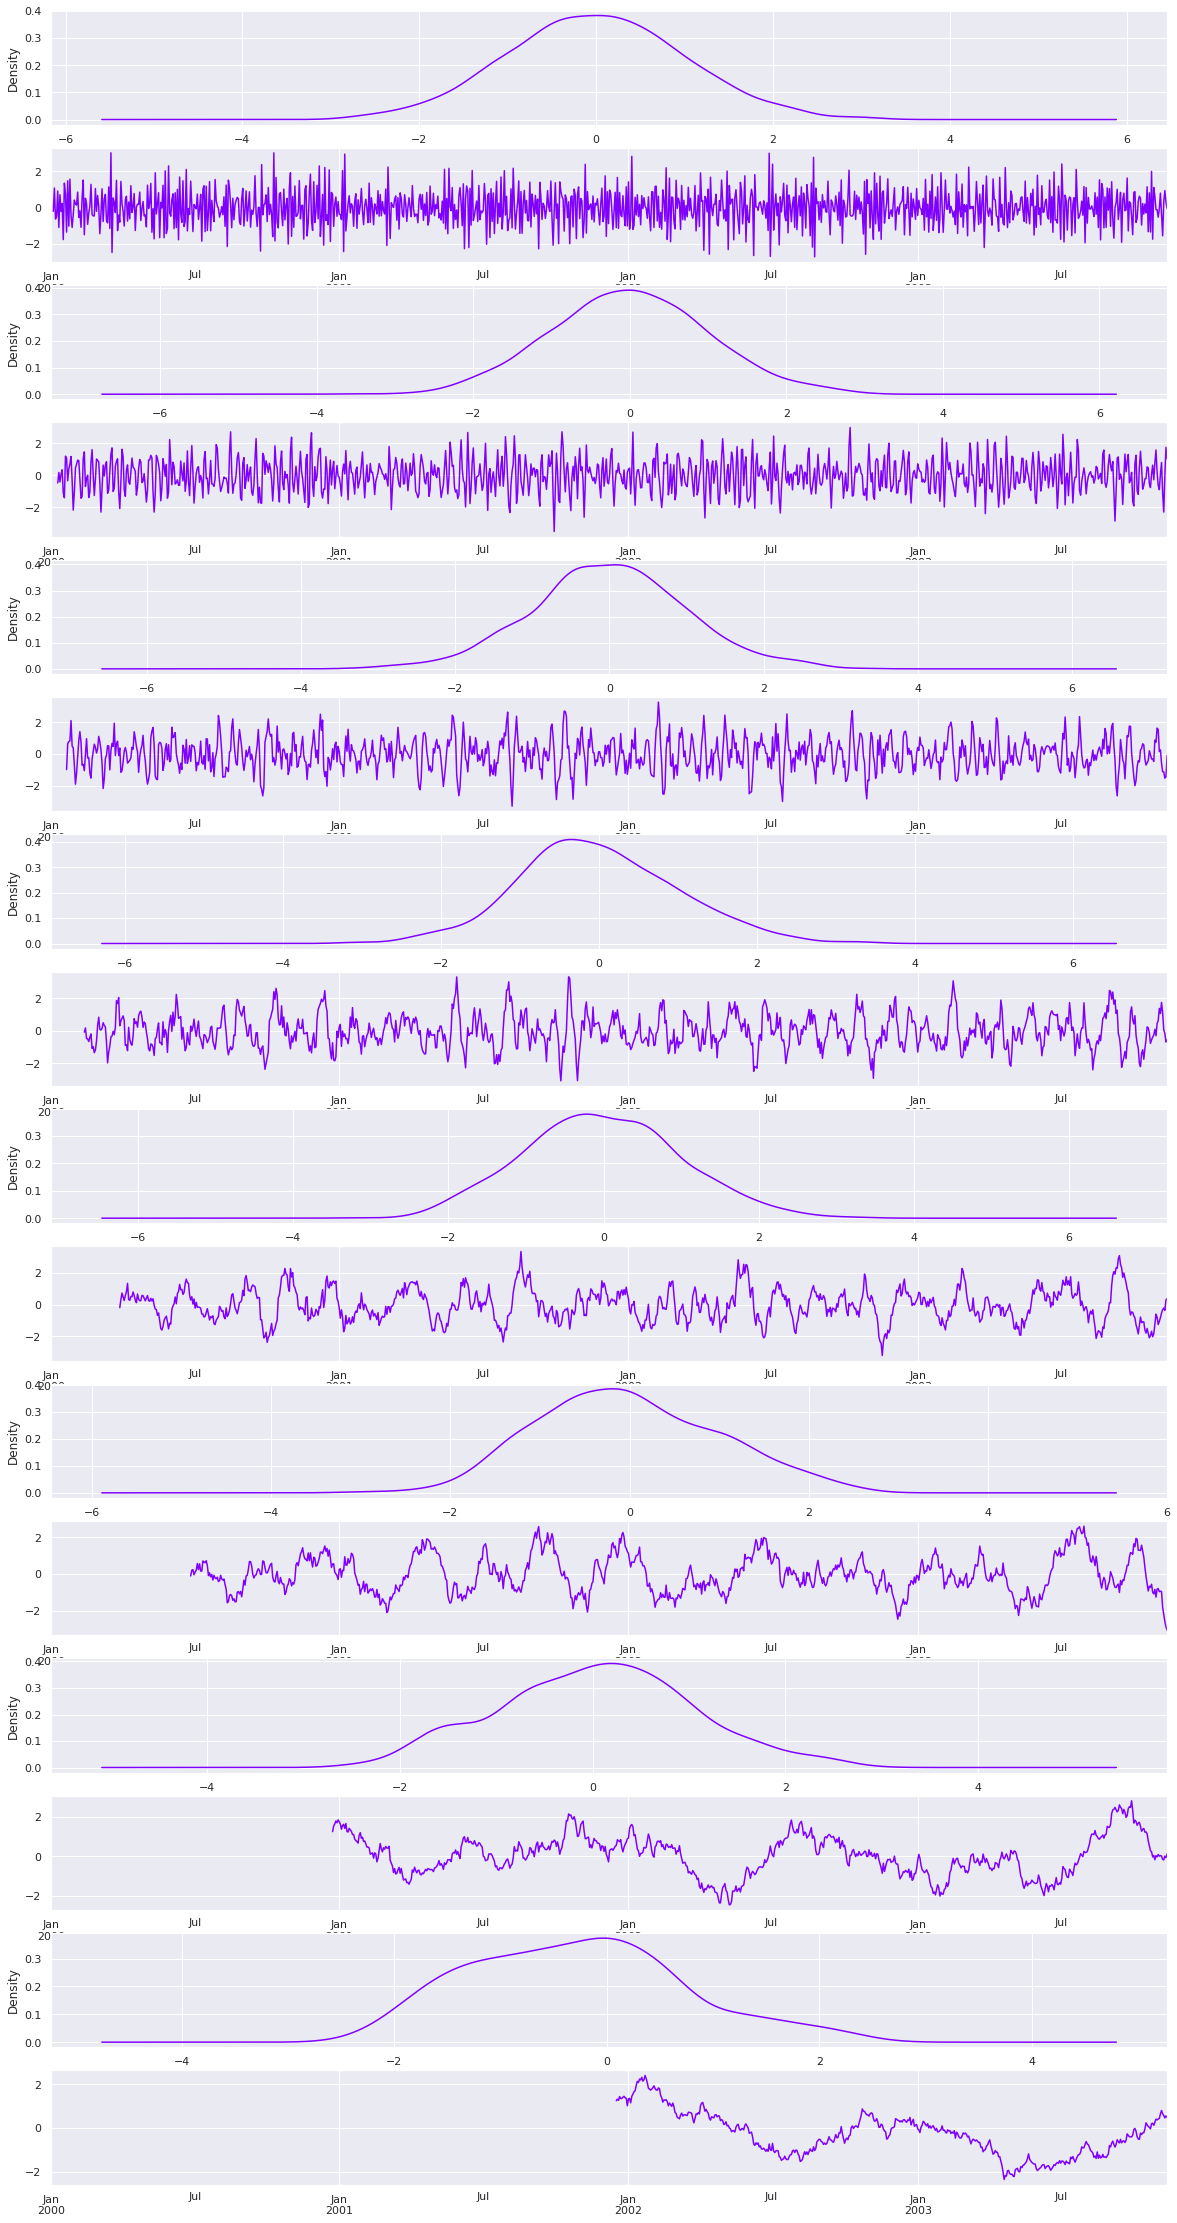

In [22]:
plot.plot_cols(rets_detail, mode="renormalize")

In [23]:
rets_detail.apply(stats.apply_normality_test)

1         2         3          4         5          6         7         8
stat  1.129077  0.509128  1.645173  10.292071  4.054384  12.412431  3.587151  11.66575
pval  0.568622  0.775254  0.439294   0.005822  0.131705   0.002017  0.166364   0.00293

/wd/dan/.conda/envs/p1_develop/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)
/wd/dan/.conda/envs/p1_develop/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


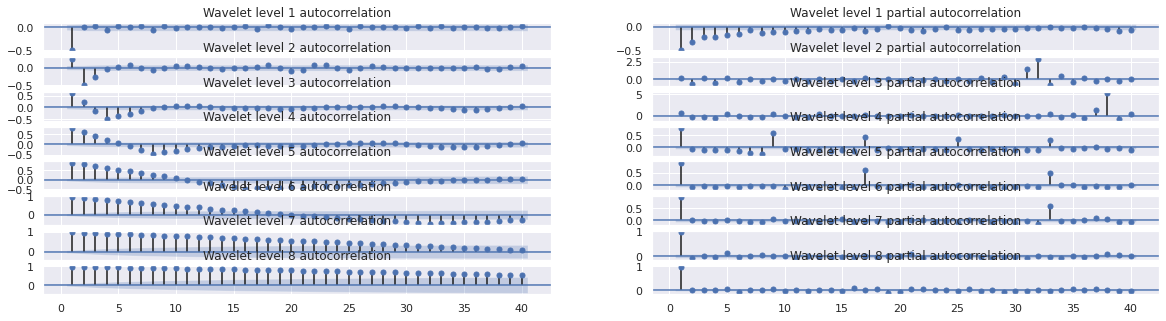

In [24]:
plot.plot_autocorrelation(rets_detail, title_prefix="Wavelet level ")

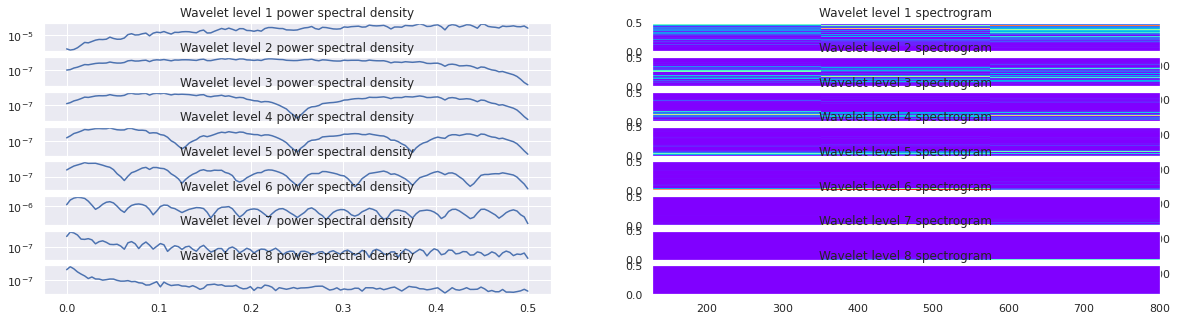

In [25]:
plot.plot_spectrum(rets_detail, title_prefix="Wavelet level ")

1         2         3         4         5         6         7         8
1  1.000000 -0.005011  0.001973  0.004755  0.000254  0.002984 -0.009899  0.003665
2 -0.005011  1.000000 -0.011876  0.019340 -0.007146 -0.002466  0.000708  0.004726
3  0.001973 -0.011876  1.000000 -0.020874  0.016303  0.015002  0.021832 -0.020744
4  0.004755  0.019340 -0.020874  1.000000  0.012327 -0.012213 -0.018466 -0.021897
5  0.000254 -0.007146  0.016303  0.012327  1.000000 -0.009624 -0.009692 -0.057066
6  0.002984 -0.002466  0.015002 -0.012213 -0.009624  1.000000  0.032968 -0.093402
7 -0.009899  0.000708  0.021832 -0.018466 -0.009692  0.032968  1.000000  0.017977
8  0.003665  0.004726 -0.020744 -0.021897 -0.057066 -0.093402  0.017977  1.000000

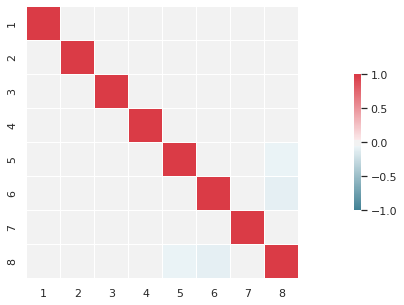

In [26]:
plot.plot_correlation_matrix(rets_detail, mode="heatmap")

### Z-scored returns

In [27]:
zscored_rets = sigp.get_dyadic_zscored(rets, demean=False)

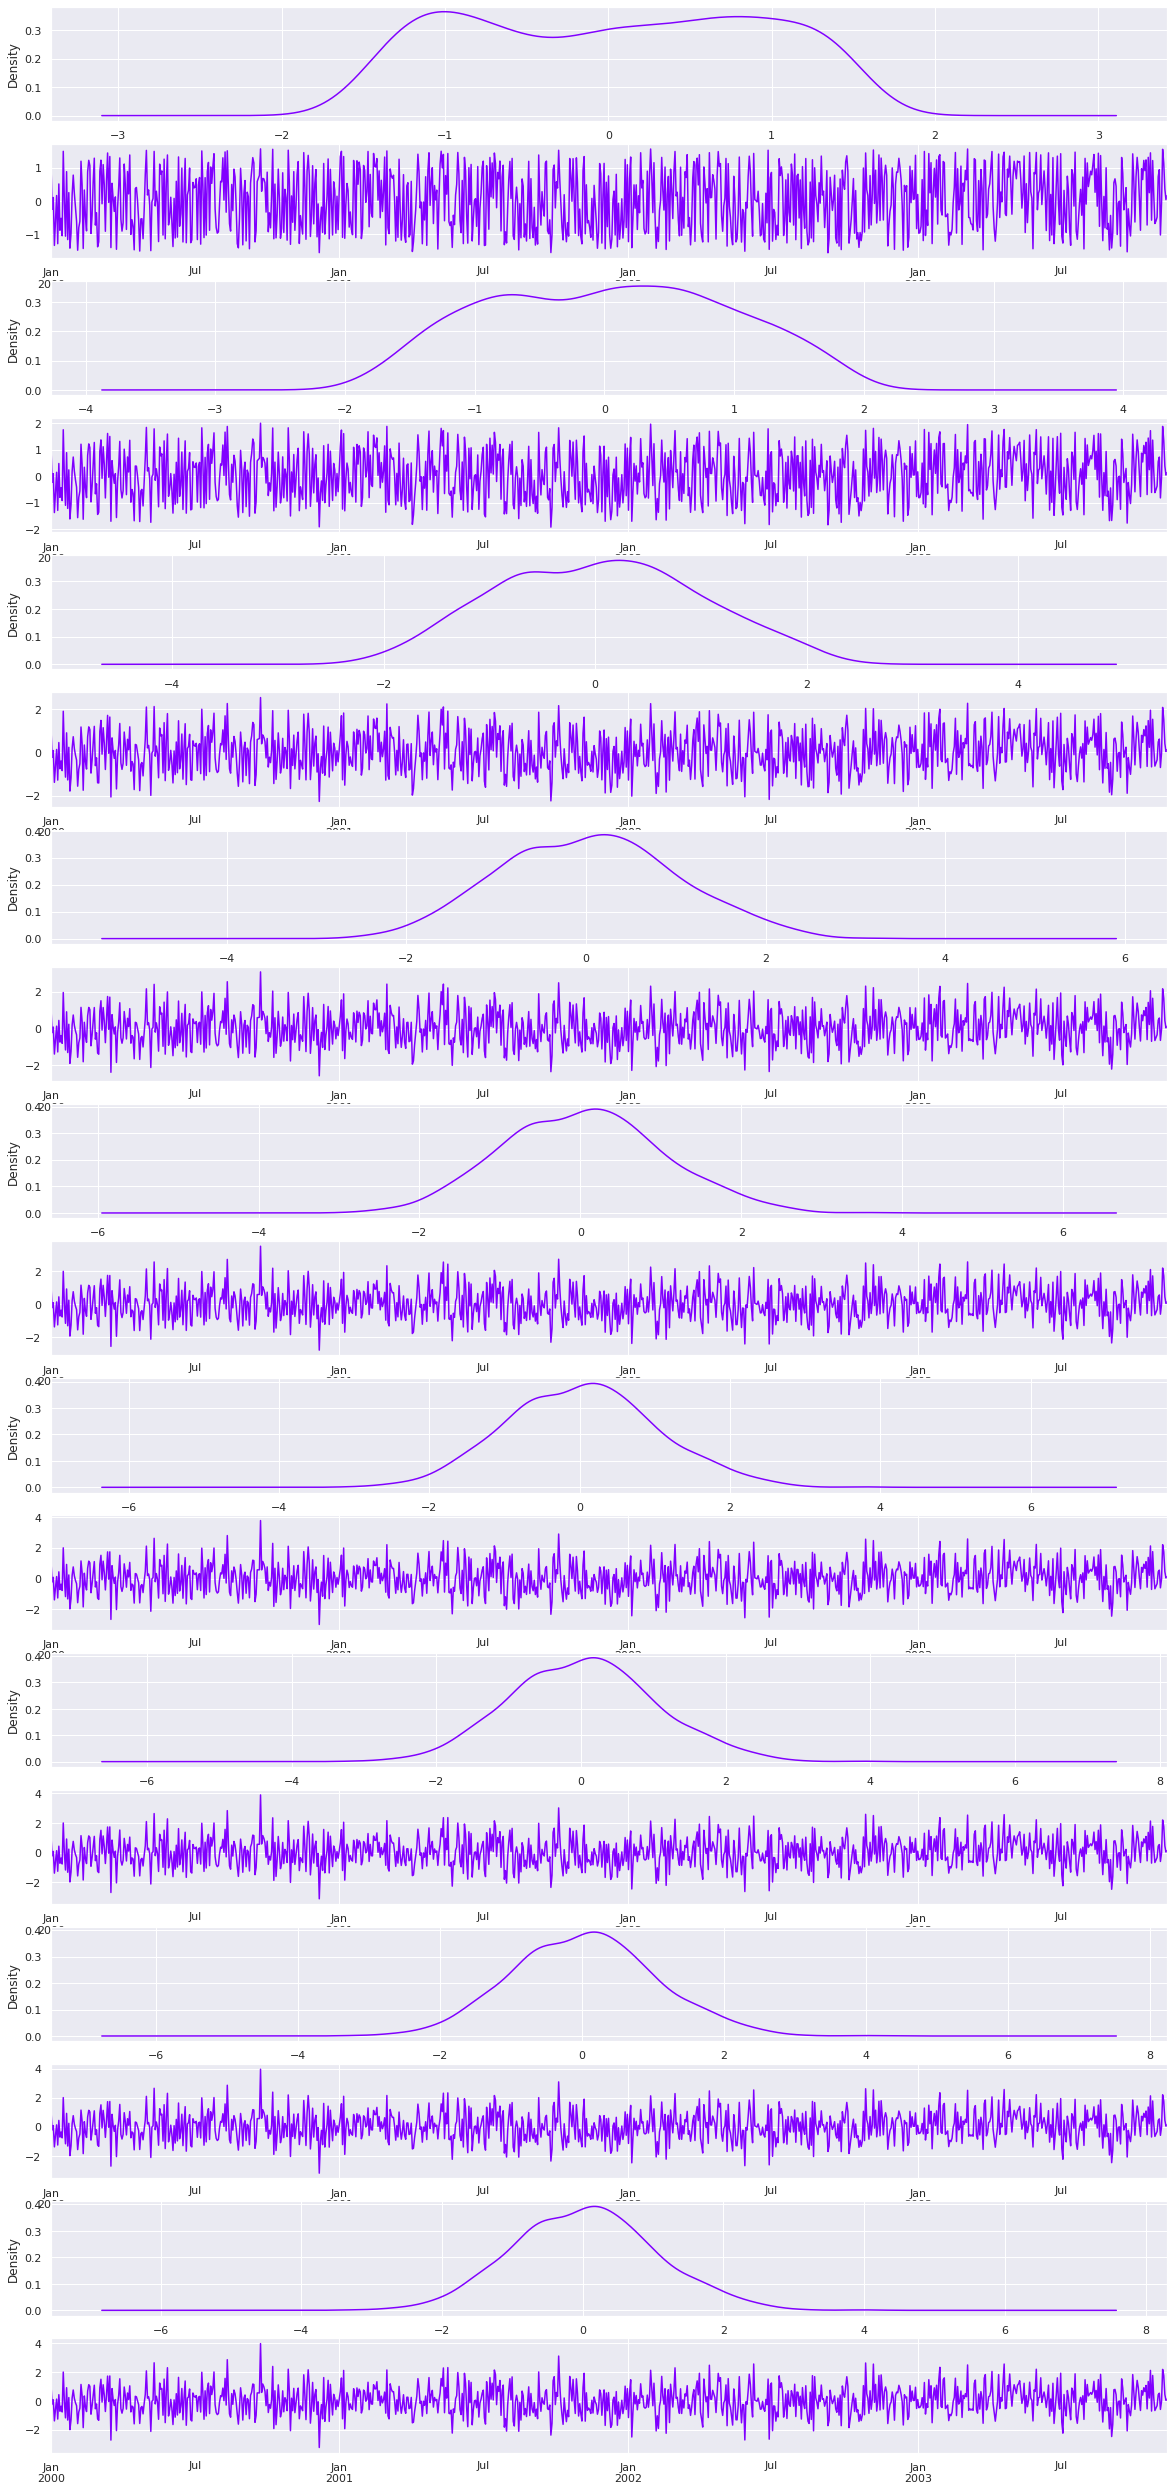

In [28]:
plot.plot_cols(zscored_rets)

In [29]:
zscored_rets.apply(stats.apply_normality_test)

1             2             3         4         5         6         7         8         9
stat  1720.885562  1.740875e+02  3.843983e+01  9.976404  3.985779  2.922414  2.666742  2.601597  2.591727
pval     0.000000  1.575382e-38  4.496734e-09  0.006818  0.136301  0.231956  0.263587  0.272314  0.273661

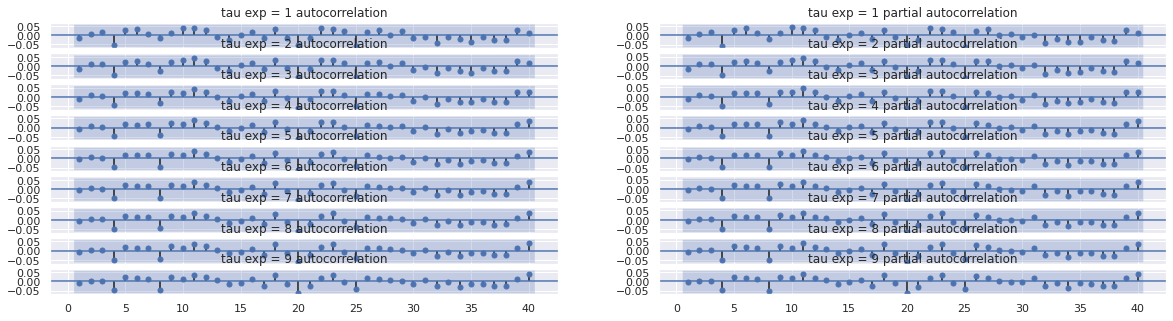

In [30]:
plot.plot_autocorrelation(zscored_rets, title_prefix="tau exp = ")

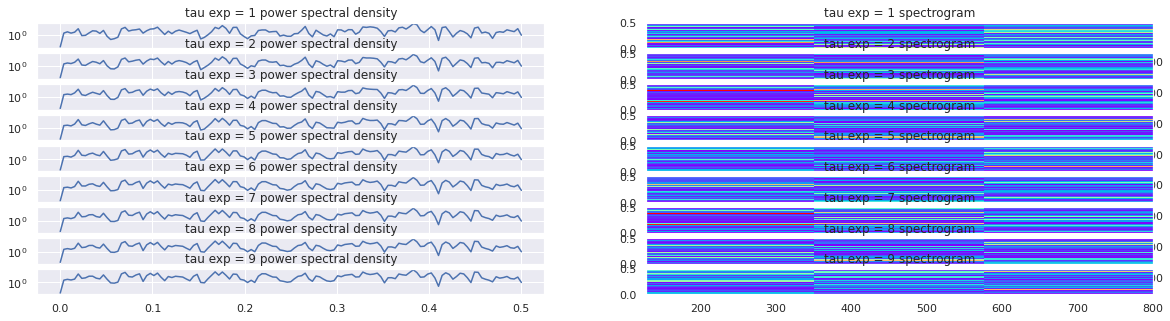

In [31]:
plot.plot_spectrum(zscored_rets, title_prefix="tau exp = ")

# EMAs and Smooth Moving Averages

In [32]:
impulse = sig_gen.get_impulse(-252, 3 * 252, tick=1)

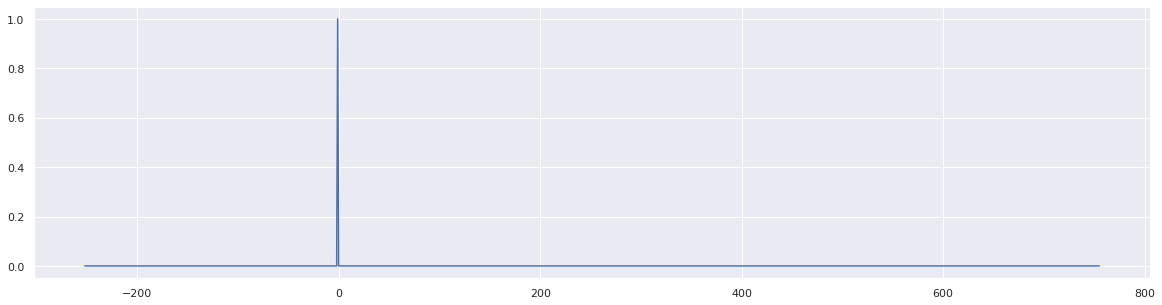

In [33]:
impulse.plot()

## Dependence of ema on depth

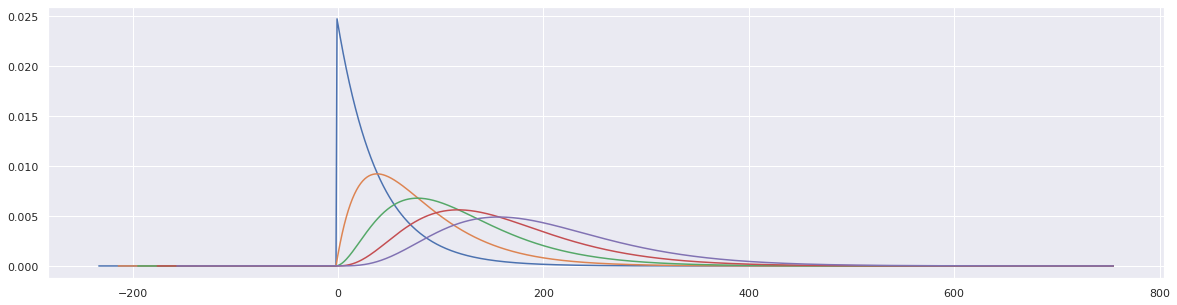

In [34]:
for i in range(1, 6):
    sigp.compute_ema(impulse, tau=40, min_periods=20, depth=i).plot()

## Dependence of smooth moving average on max depth

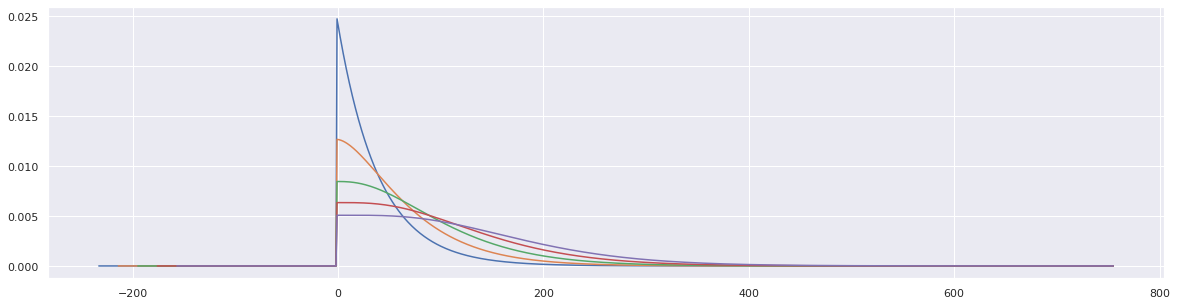

In [35]:
for i in range(1, 6):
    sigp.compute_smooth_moving_average(
        impulse, tau=40, min_periods=20, min_depth=1, max_depth=i
    ).plot()

## Dependence of smooth moving average on min depth

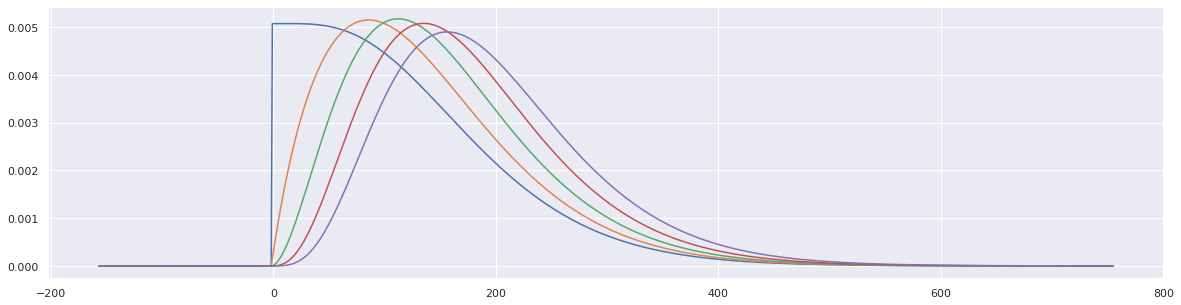

In [36]:
for i in range(1, 6):
    sigp.compute_smooth_moving_average(
        impulse, tau=40, min_periods=20, min_depth=i, max_depth=5
    ).plot()

## Dependence of rolling norm on max depth

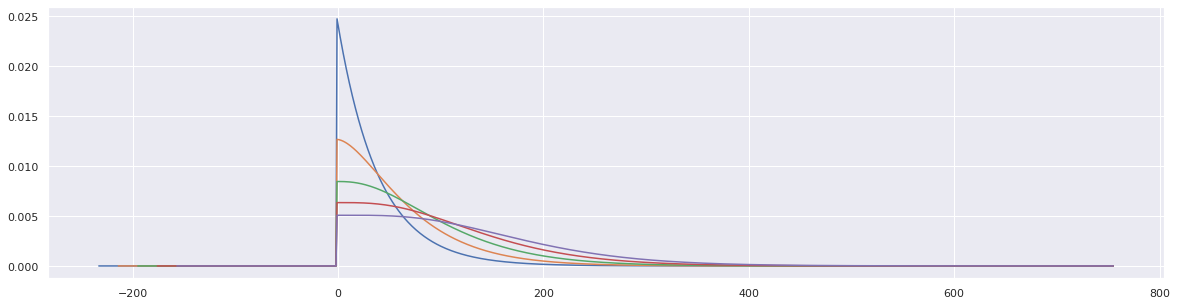

In [37]:
for i in range(1, 6):
    sigp.compute_rolling_norm(
        impulse, tau=40, min_periods=20, min_depth=1, max_depth=i, p_moment=1
    ).plot()

## Dependence of rolling norm on moment

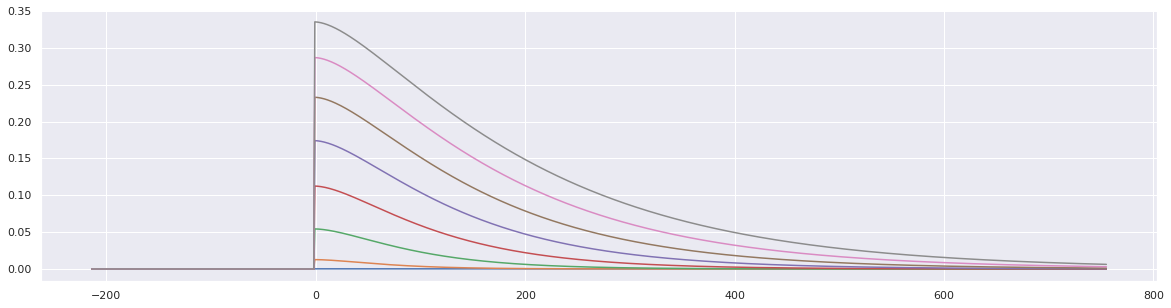

In [38]:
for i in np.arange(0.5, 4.5, 0.5):
    sigp.compute_rolling_norm(
        impulse, tau=40, min_periods=20, min_depth=1, max_depth=2, p_moment=i
    ).plot()

# Smooth Derivatives

## Dependence on tau

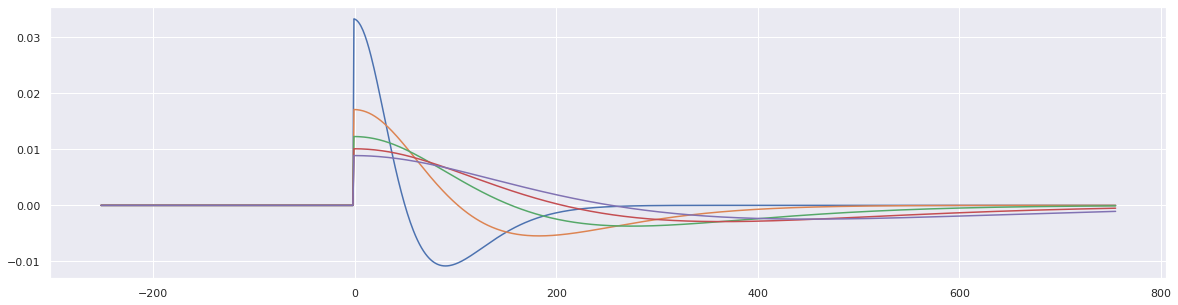

In [39]:
for i in range(1, 6):
    sigp.compute_smooth_derivative(
        impulse, tau=100 * i, min_periods=0, scaling=0, order=1
    ).plot()

## Dependence on order

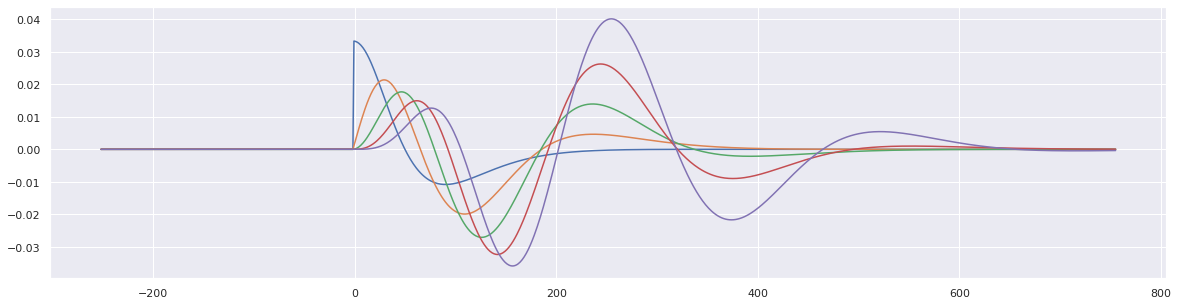

In [40]:
for i in range(1, 6):
    sigp.compute_smooth_derivative(
        impulse, tau=100, min_periods=0, scaling=0, order=i
    ).plot()

## Application to slope 1 linear growth with varying tau, scaling = 1

In [41]:
linear_growth = pd.Series(index=price.index, data=range(price.size))

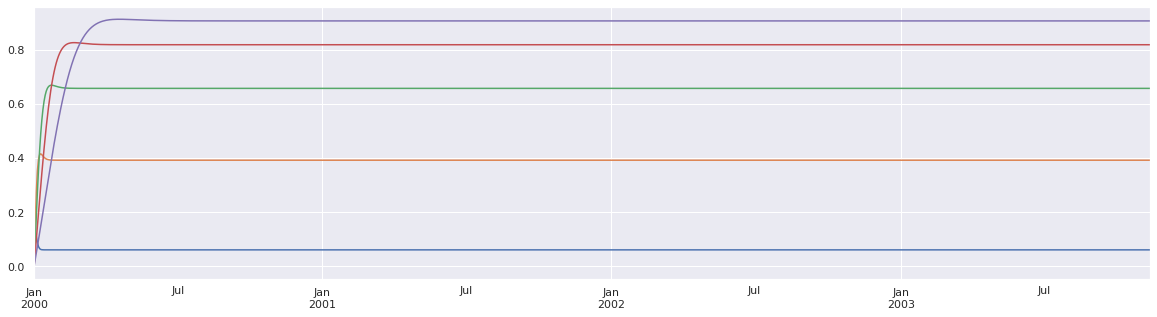

In [42]:
for i in range(1, 6):
    sigp.compute_smooth_derivative(
        linear_growth, tau=2 ** i, min_periods=0, scaling=1, order=1
    ).plot()

## Application to prices

In [43]:
dprice = pd.DataFrame(index=price.index)
dprice["rets"] = rets

In [44]:
for i in range(0, 7):
    dprice[i] = sigp.compute_smooth_derivative(
        price, tau=2 ** i, min_periods=0, scaling=1, order=1
    )

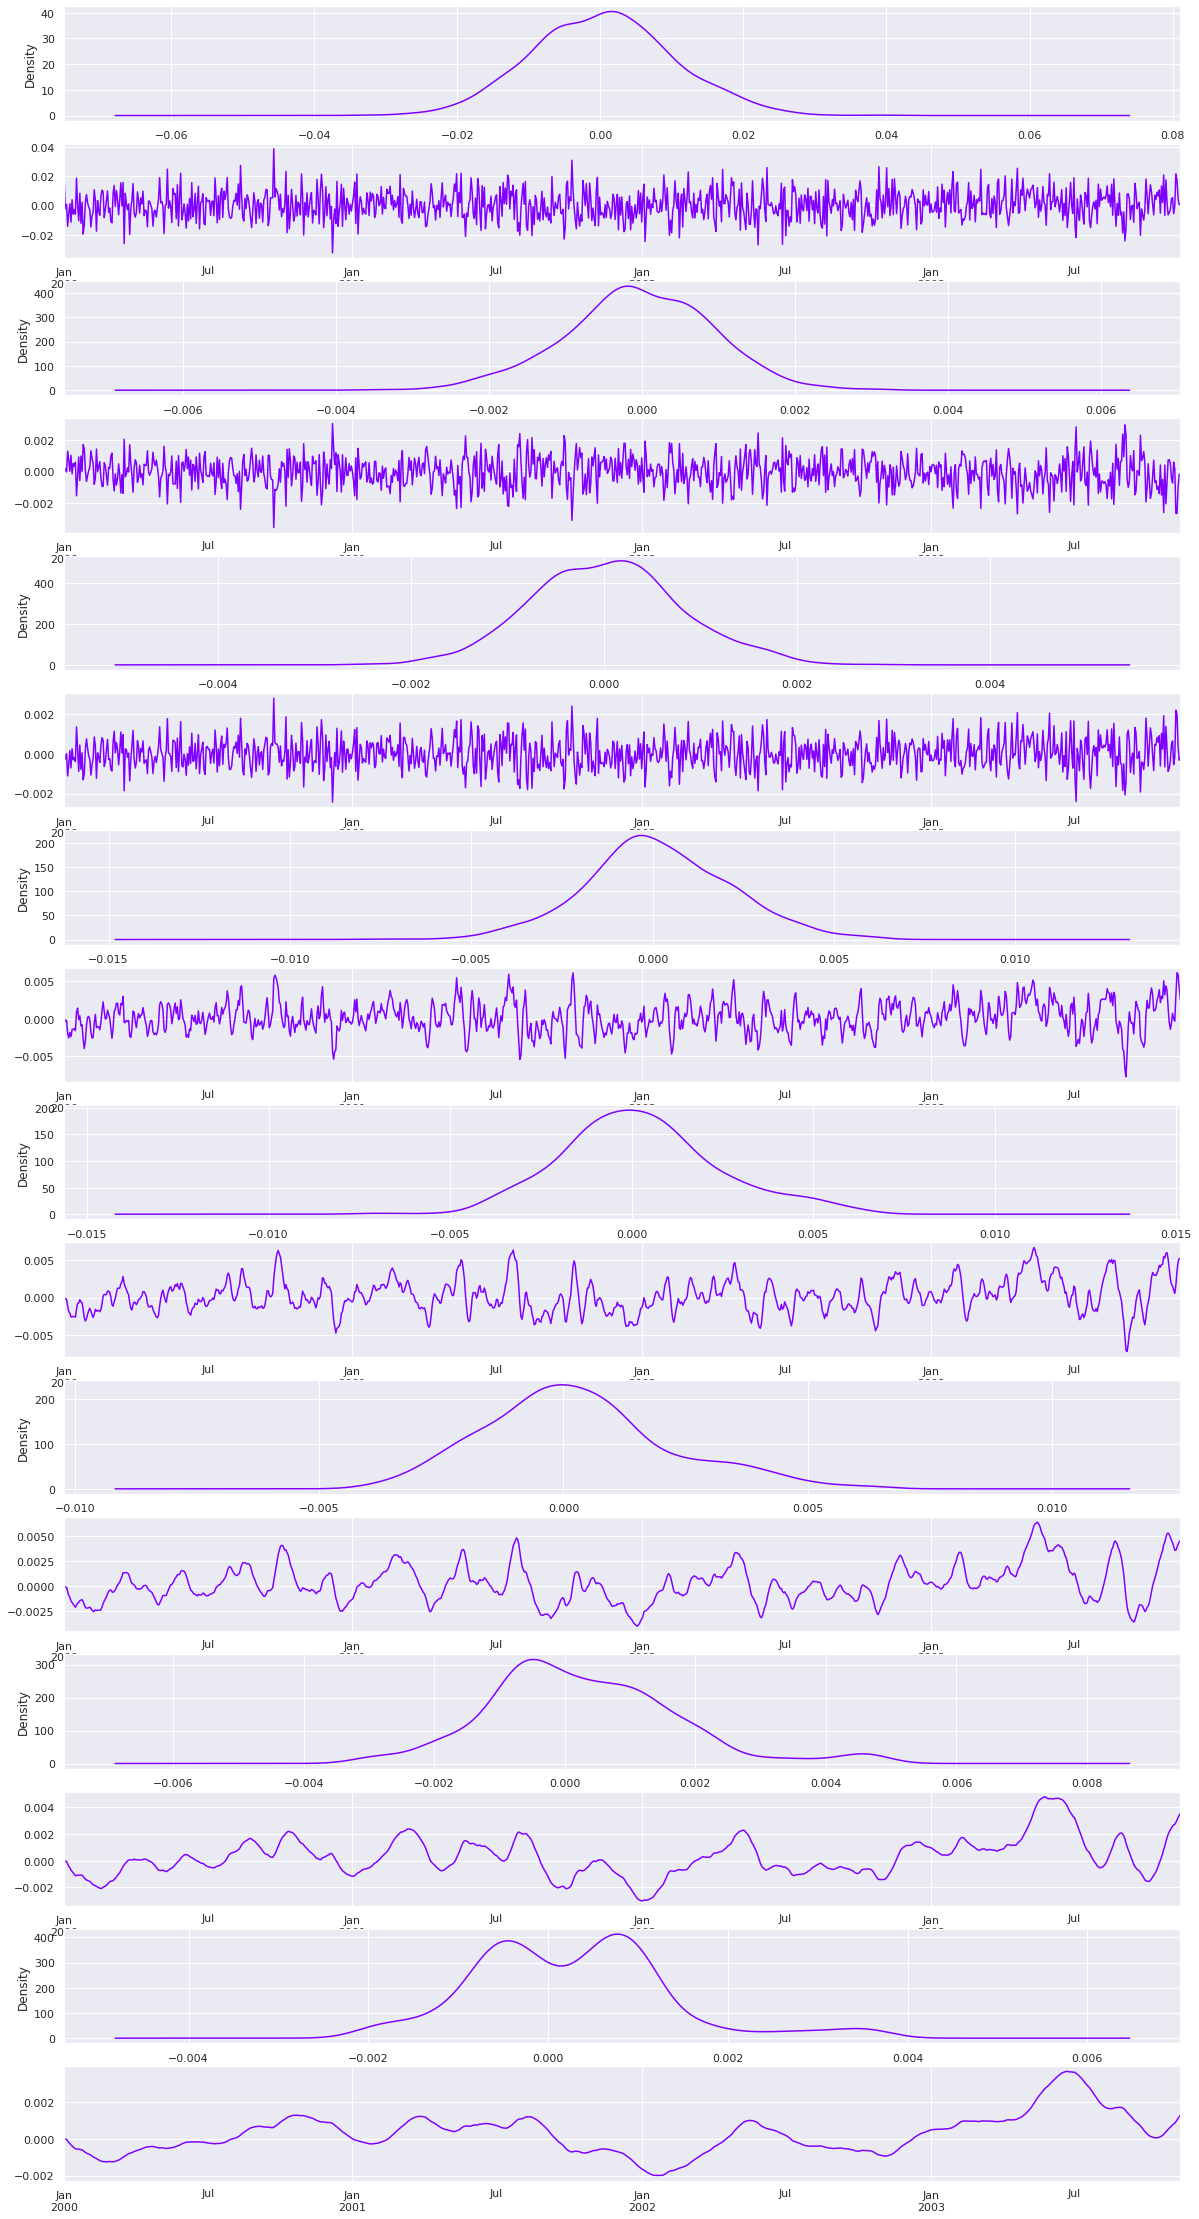

In [45]:
plot.plot_cols(dprice)

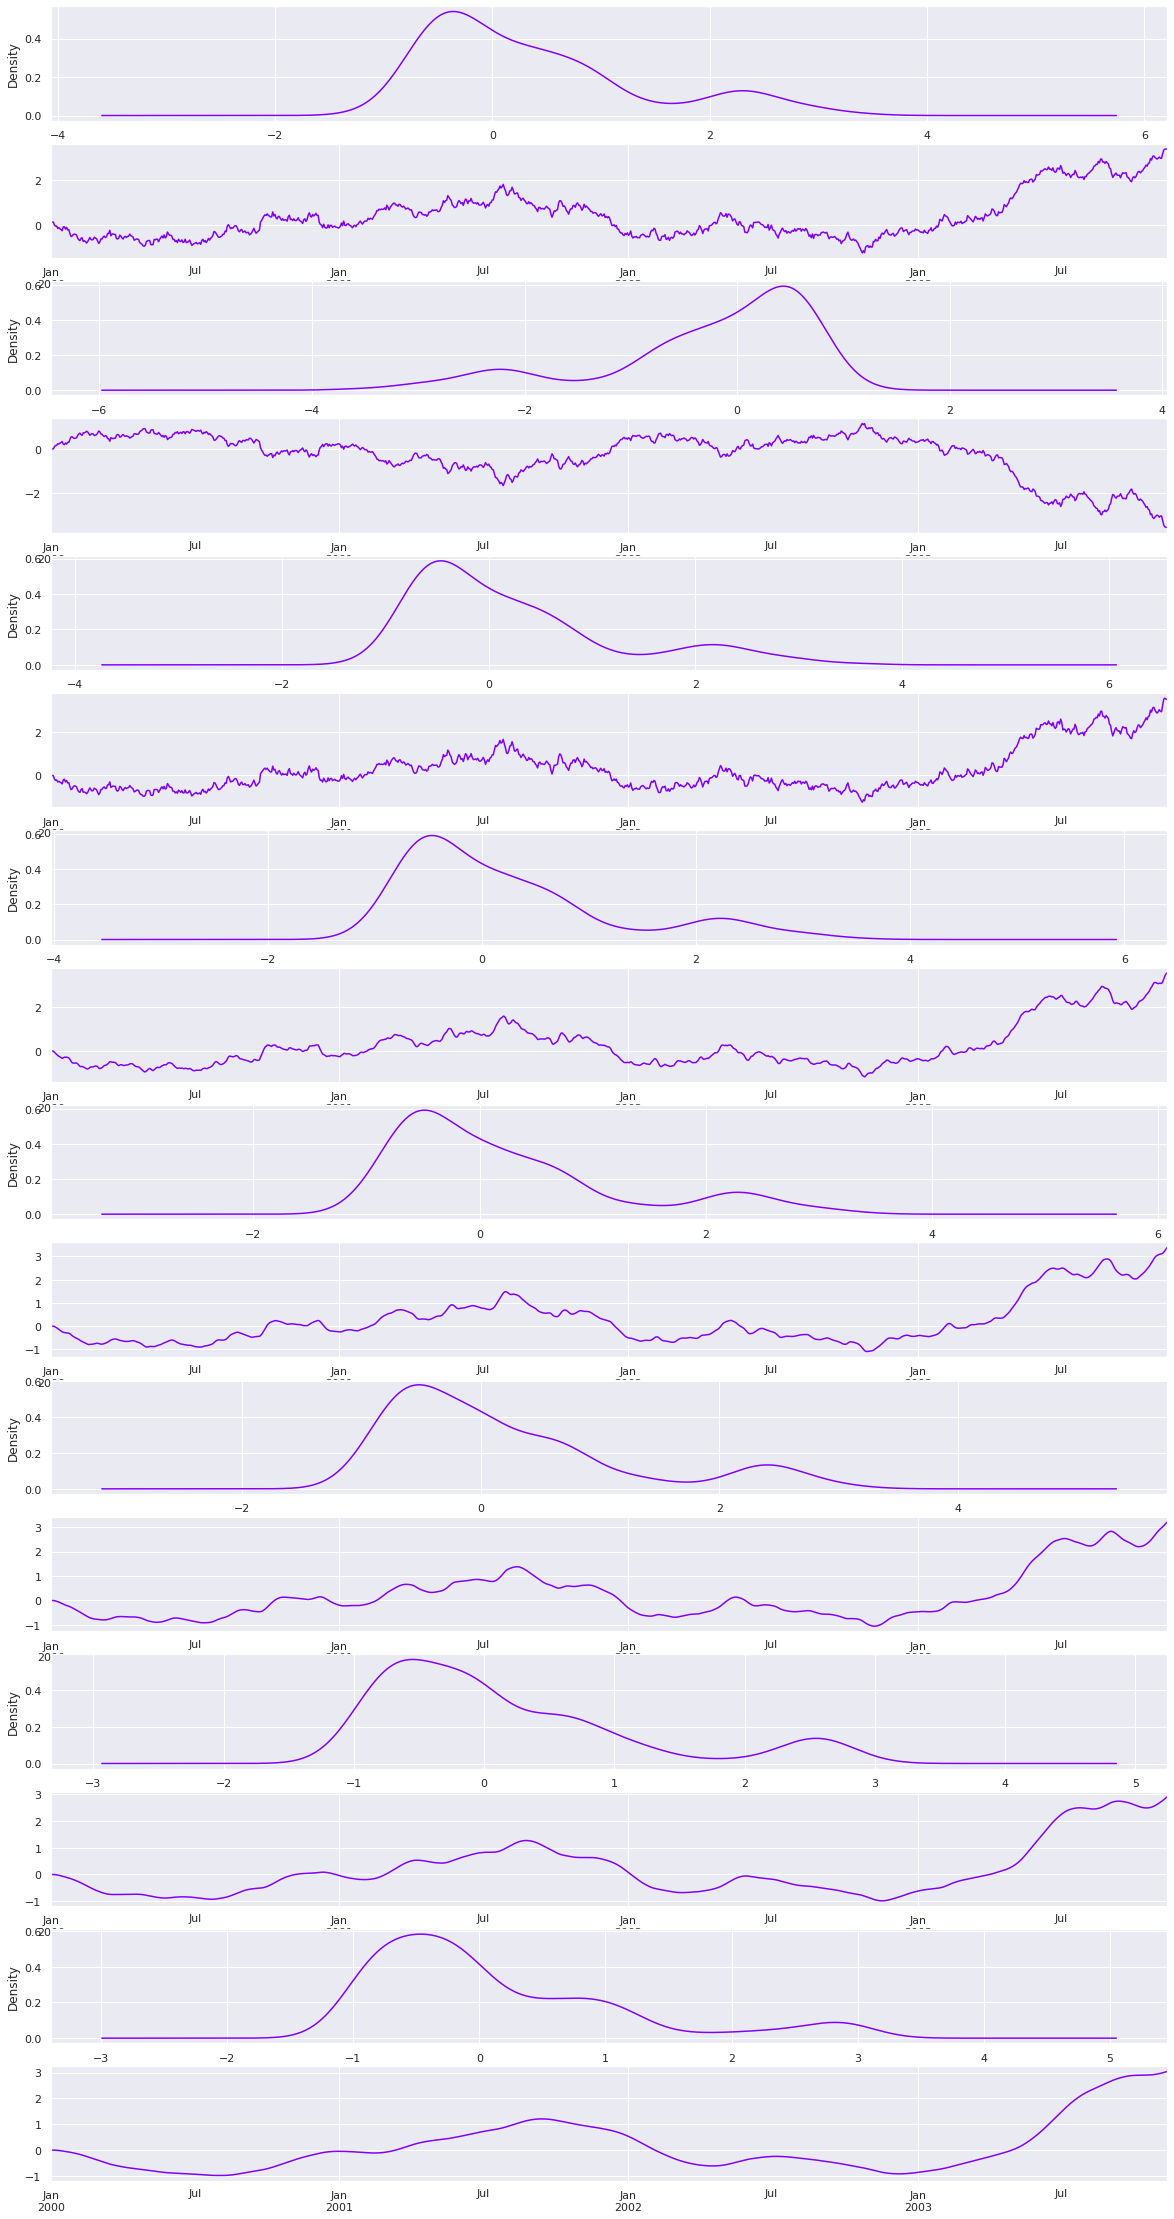

In [46]:
plot.plot_cols(dprice.cumsum(), mode="renormalize")

# Multivariate series

In [47]:
mvn = sig_gen.MultivariateNormalProcess()
mvn.set_cov_from_inv_wishart_draw(dim=8, seed=10)
mvn_rets = mvn.generate_sample(
    {"start": "2000-01-01", "periods": 4 * 252, "freq": "B"}, seed=10
)

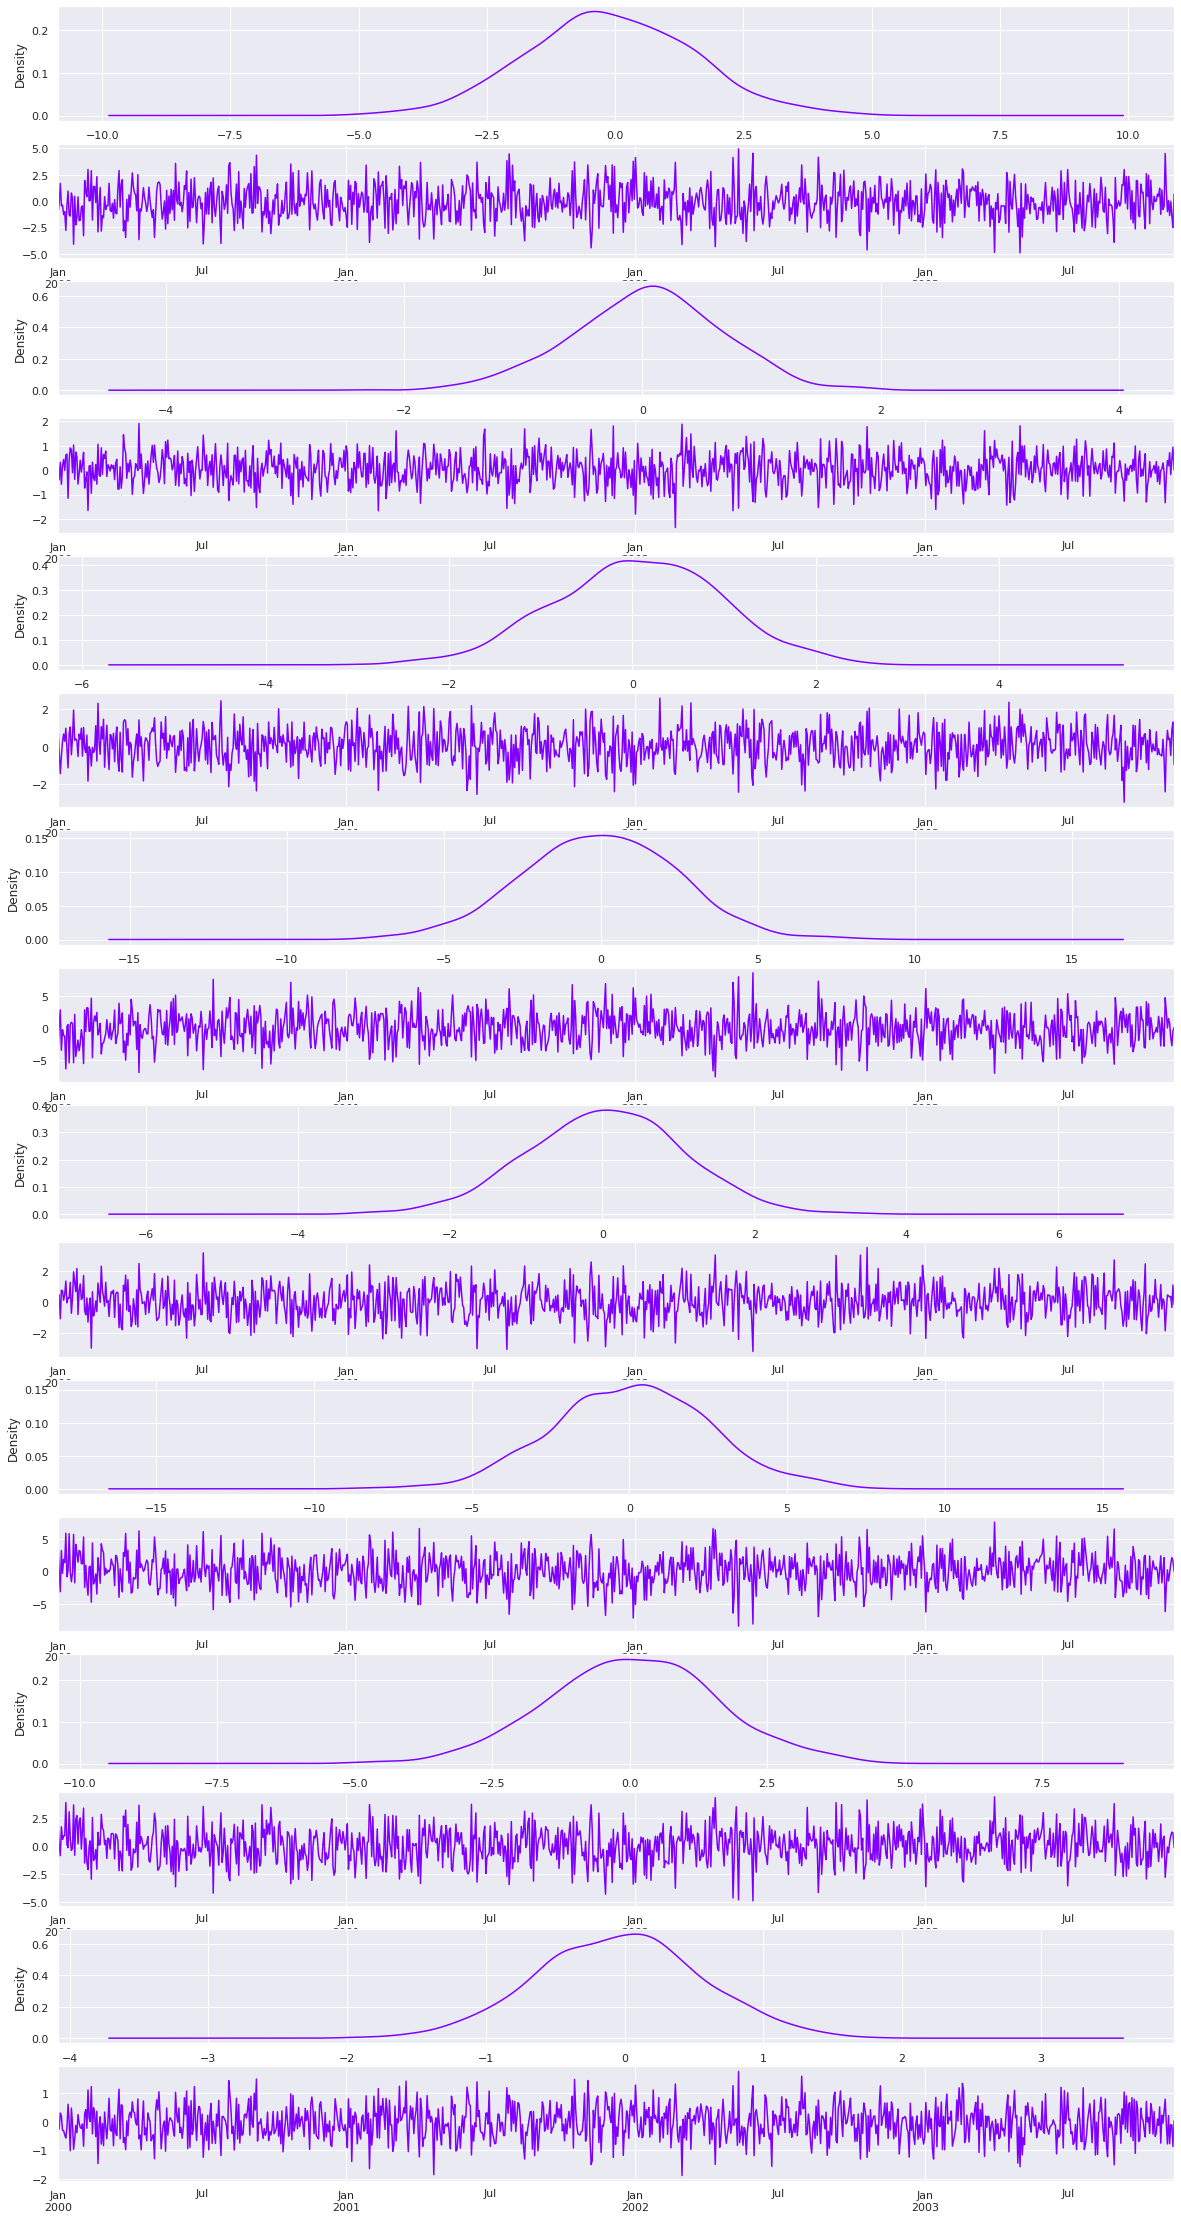

In [48]:
plot.plot_cols(mvn_rets)

## Z-score the time series

In [49]:
mvn_zrets = sigp.compute_rolling_zscore(mvn_rets, tau=16, demean=False)

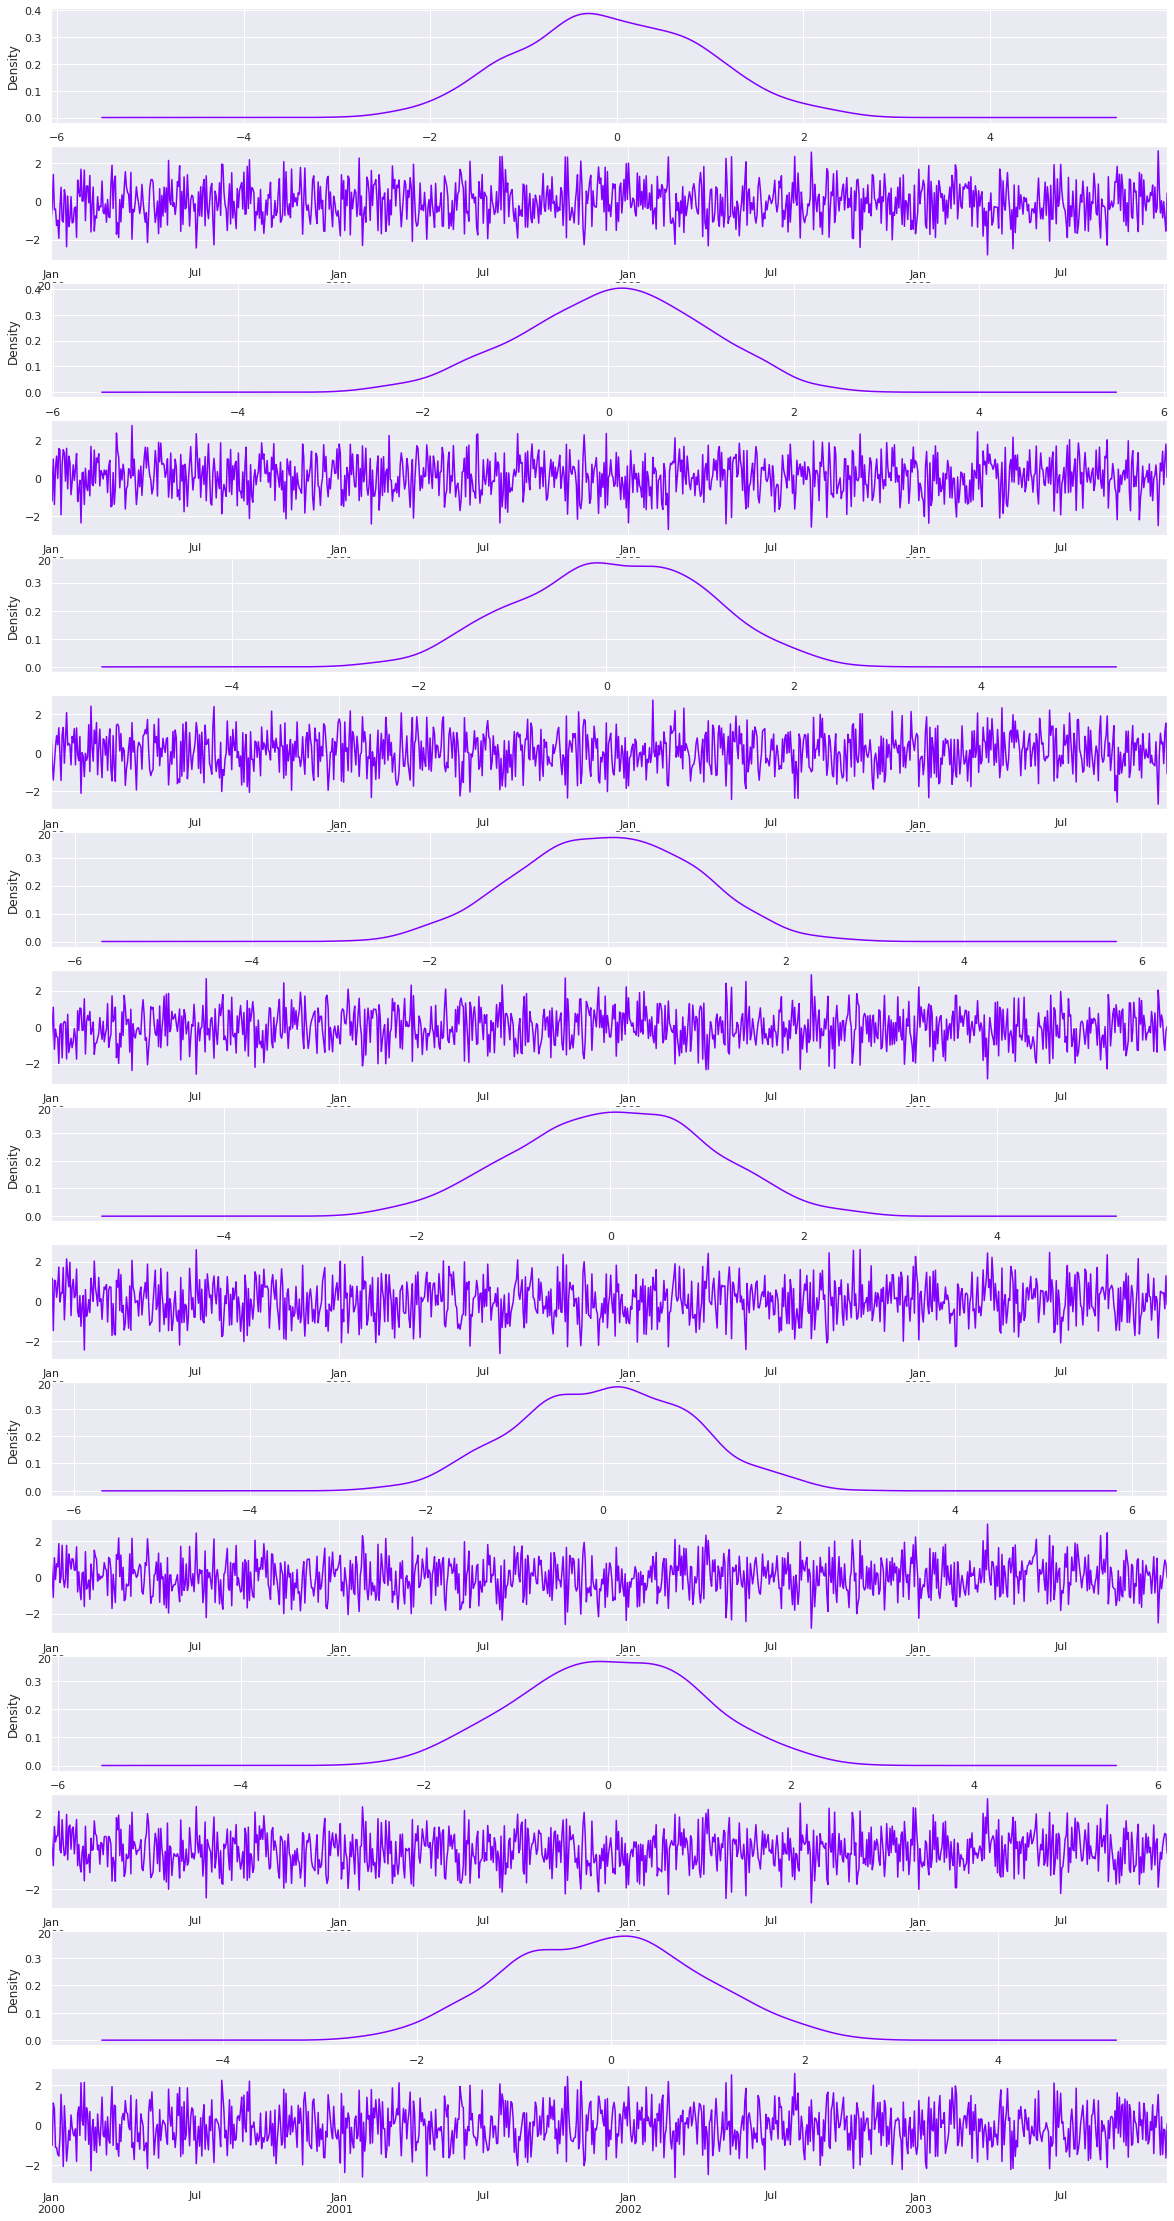

In [50]:
plot.plot_cols(mvn_zrets)

## Compute Incremental PCA

In [51]:
eigenvalues, eigenvectors = sigp.compute_ipca(mvn_zrets, num_pc=3, alpha=1 / 65)

com = 64.00
Initializing eigenvector 1...
Initializing eigenvector 2...
Initializing eigenvector 3...
Completed 1008 steps of incremental PCA.


### Plot eigenvalue evolution over time

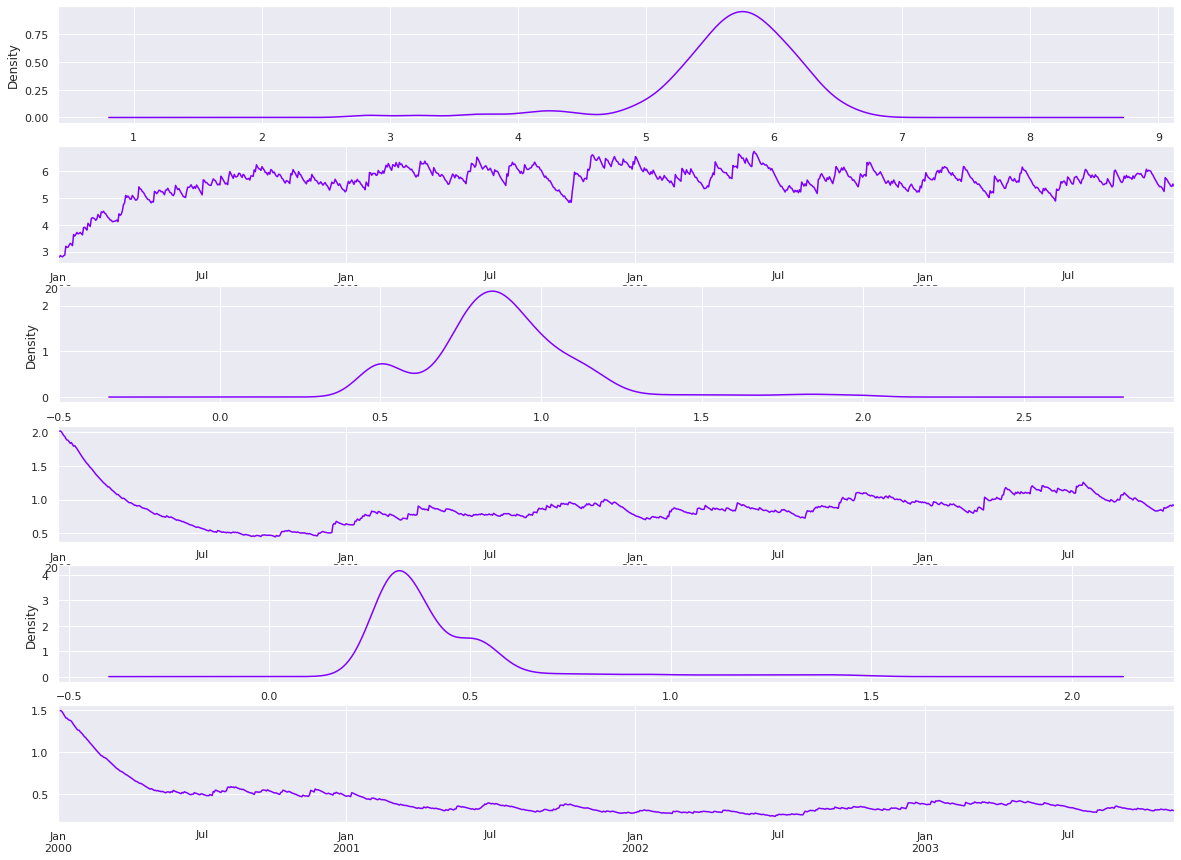

In [52]:
plot.plot_cols(eigenvalues)

### Plot eigenvector evolution over time

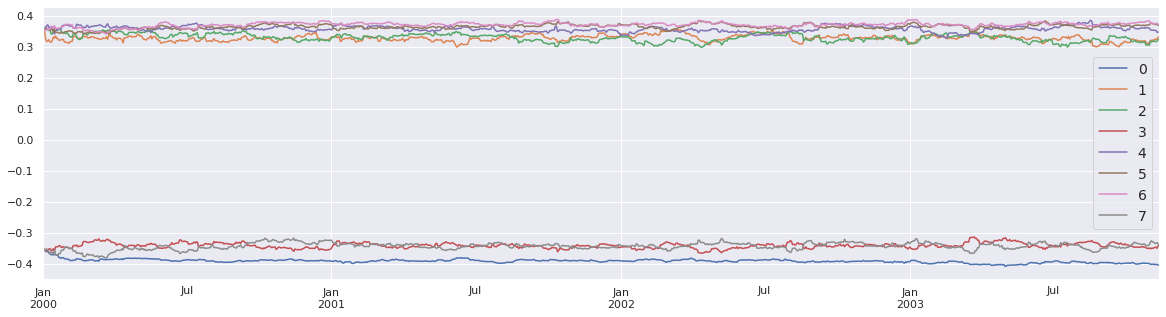

In [53]:
eigenvectors[0].plot()

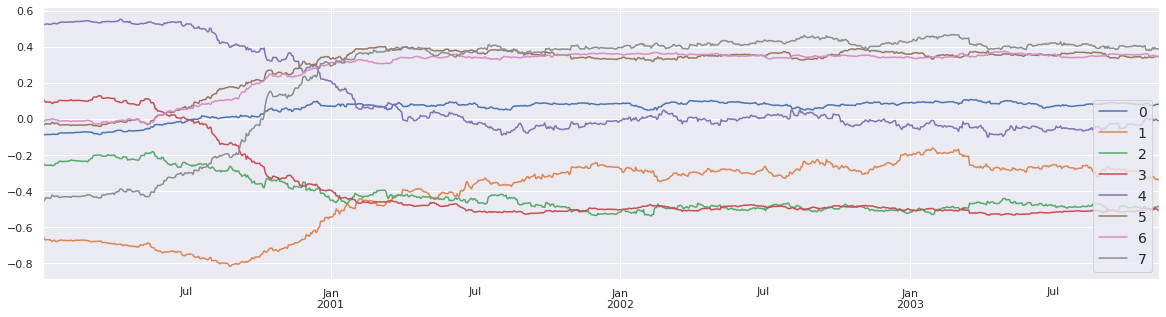

In [54]:
eigenvectors[1].plot()

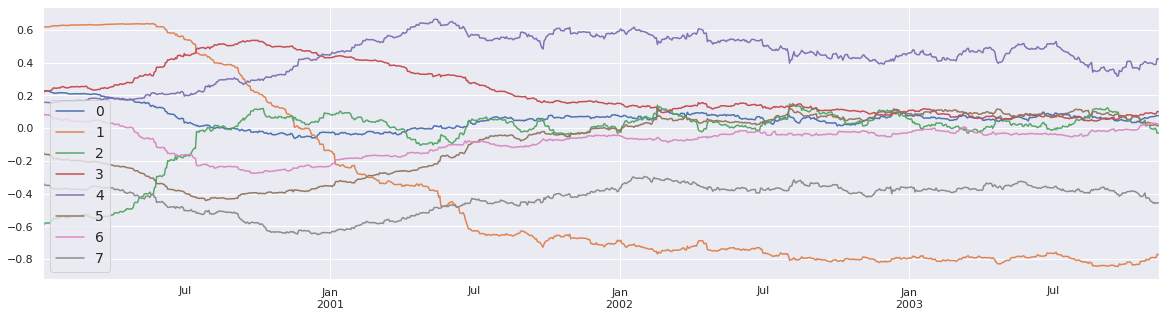

In [55]:
eigenvectors[2].plot()

### Plot eigenvector angular distance change over time

In [56]:
eigenvector_diffs = sigp.compute_eigenvector_diffs(eigenvectors)

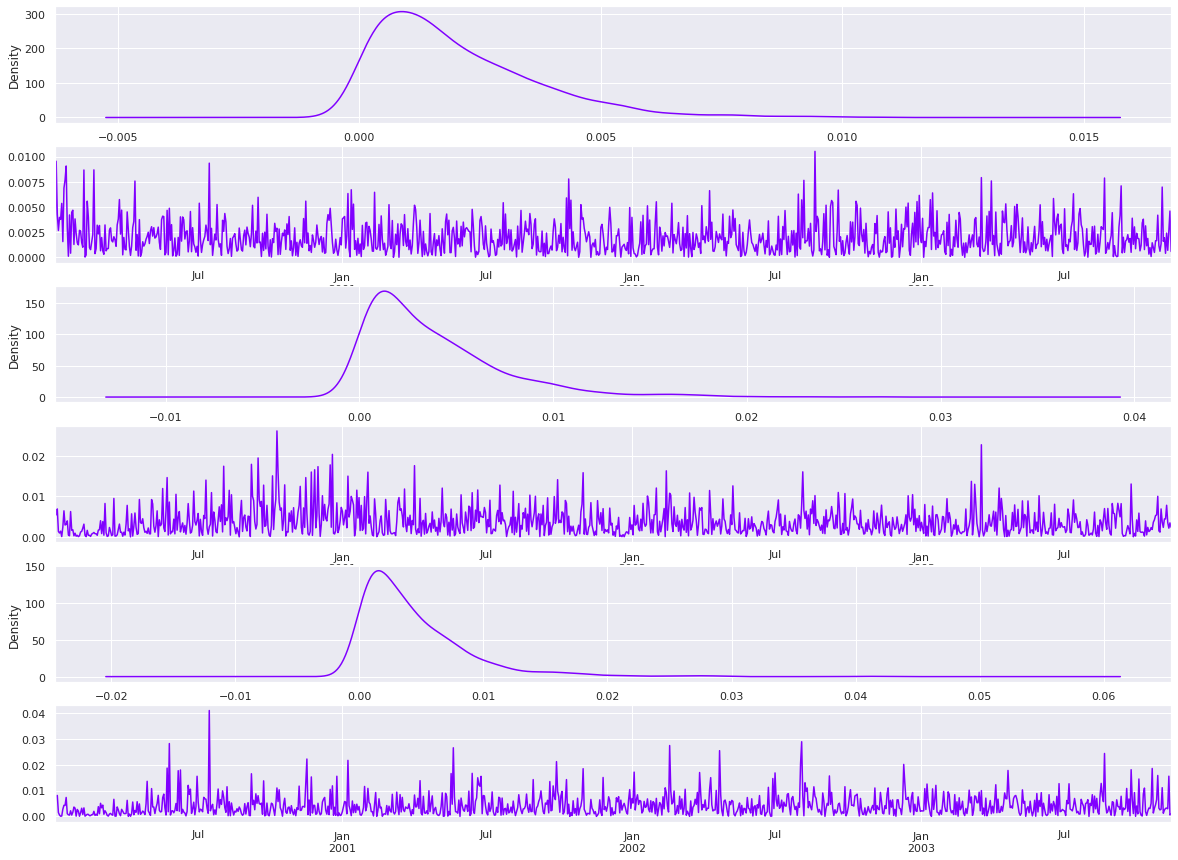

In [57]:
plot.plot_cols(eigenvector_diffs)

# Outlier handling

[-1.74976547  0.3426804   1.1530358  -0.25243604  0.98132079]


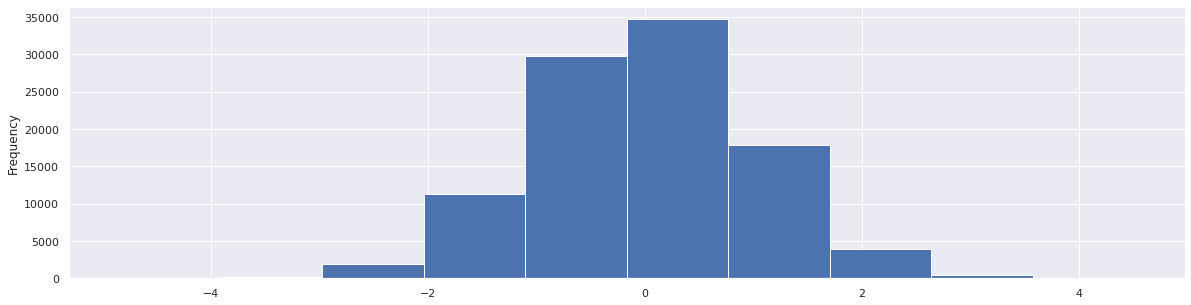

In [58]:
np.random.seed(100)
n = 100000
data = np.random.normal(loc=0.0, scale=1.0, size=n)
print(data[:5])

srs = pd.Series(data)
srs.plot(kind="hist")

In [59]:
def _analyze(srs):
    print(np.isnan(srs).sum())
    srs.plot(kind="hist")
    plt.show()
    pprint.pprint(info)

0


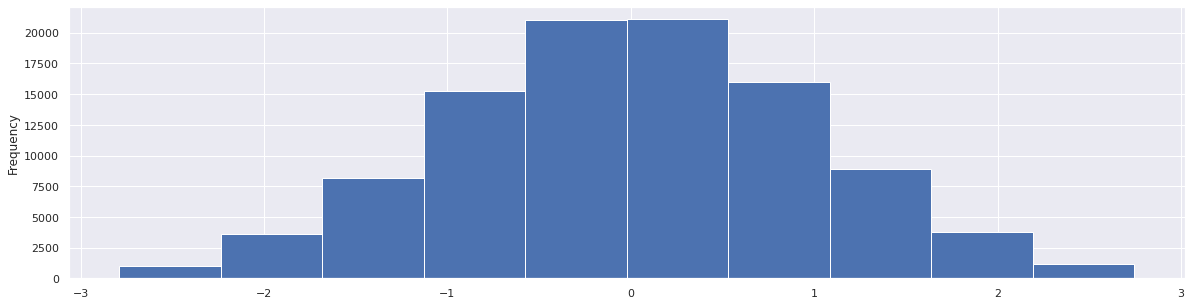

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.99)),
             ('mode', 'winsorize'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -2.360705  2.370013
99996 -2.360705  2.370013
99997 -2.360705  2.370013
99998 -2.360705  2.370013
99999 -2.360705  2.370013

[100000 rows x 2 columns]),
             ('num_elems_removed', 2036),
             ('num_elems_after', 97964),
             ('percentage_removed', 2.036),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [60]:
mode = "winsorize"
lower_quantile = 0.01
window = 1000
min_periods = 10
info = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs, mode, lower_quantile, window=window, min_periods=min_periods, info=info
)
#
_analyze(srs_out)

0


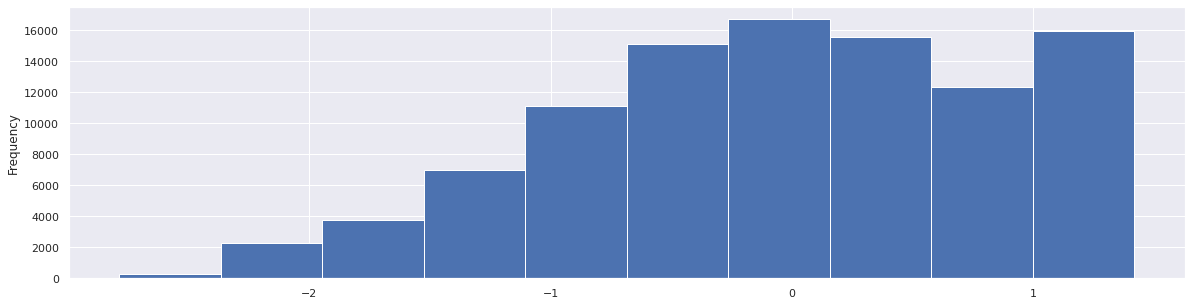

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.9)),
             ('mode', 'winsorize'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -2.360705  1.185876
99996 -2.360705  1.185876
99997 -2.360705  1.185876
99998 -2.360705  1.185876
99999 -2.360705  1.185876

[100000 rows x 2 columns]),
             ('num_elems_removed', 11031),
             ('num_elems_after', 88969),
             ('percentage_removed', 11.031),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [61]:
mode = "winsorize"
lower_quantile = 0.01
upper_quantile = 0.90
window = 1000
min_periods = 10
info = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs,
    mode,
    lower_quantile,
    upper_quantile=upper_quantile,
    window=window,
    min_periods=min_periods,
    info=info,
)
#
_analyze(srs_out)

2036


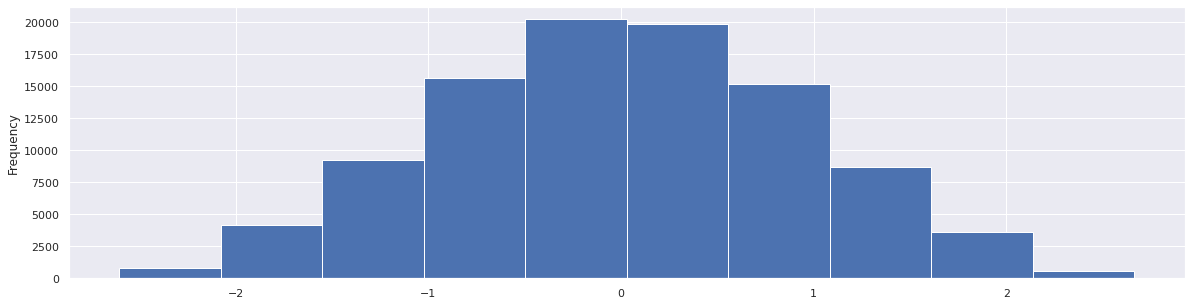

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.01, 0.99)),
             ('mode', 'set_to_nan'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -2.360705  2.370013
99996 -2.360705  2.370013
99997 -2.360705  2.370013
99998 -2.360705  2.370013
99999 -2.360705  2.370013

[100000 rows x 2 columns]),
             ('num_elems_removed', 2036),
             ('num_elems_after', 97964),
             ('percentage_removed', 2.036),
             ('num_nans_after', 2036),
             ('num_infs_after', 0)])


In [62]:
mode = "set_to_nan"
lower_quantile = 0.01
window = 1000
min_periods = 10
info = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs, mode, lower_quantile, window=window, min_periods=min_periods, info=info
)
#
_analyze(srs_out)

0


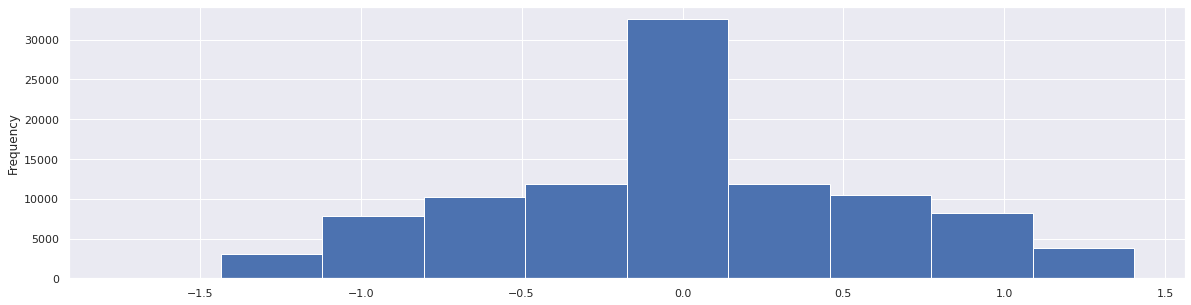

OrderedDict([('series_name', None),
             ('num_elems_before', 100000),
             ('num_nans_before', 0),
             ('num_infs_before', 0),
             ('quantiles', (0.1, 0.9)),
             ('mode', 'set_to_zero'),
             ('bounds',
                      l_bound   u_bound
0           NaN       NaN
1           NaN       NaN
2           NaN       NaN
3           NaN       NaN
4           NaN       NaN
...         ...       ...
99995 -1.332348  1.185876
99996 -1.331786  1.185876
99997 -1.332348  1.185876
99998 -1.331786  1.185876
99999 -1.331786  1.185876

[100000 rows x 2 columns]),
             ('num_elems_removed', 19999),
             ('num_elems_after', 80001),
             ('percentage_removed', 19.999),
             ('num_nans_after', 0),
             ('num_infs_after', 0)])


In [63]:
mode = "set_to_zero"
lower_quantile = 0.10
window = 1000
min_periods = 10
info = collections.OrderedDict()
srs_out = sigp.process_outliers(
    srs, mode, lower_quantile, window=window, min_periods=min_periods, info=info
)
#
_analyze(srs_out)